# Импорт библиотек

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

# Загрузка и очистка данных, кодирование признаков

In [96]:
train_data = pd.read_csv('cleararchivecars.csv')
price = train_data['Price']
train_data['Model'] = train_data['Model'] + ', ' + train_data['Generation']
train_data = train_data.loc[:, 'Model':'Kilometers']
train_data.drop(columns=['Oil'], axis=1, inplace=True)
train_data['Price'] = price
for i in train_data.columns:
    train_data[i] = train_data[i].replace('0', np.NaN)
train_data['Kilometers'] = train_data['Kilometers'].replace('новыйавтомобиль', 0)
train_data['Kilometers'] = train_data['Kilometers'].astype(float)
train_data['Price'] = train_data['Price'].astype(float)
train_data['Year'] = train_data['Year'].astype(float)
train_data['Power'] = train_data['Power'].astype(float)
train_data = train_data.dropna()

In [97]:
test_data = pd.read_csv('clearcars.csv')
price = test_data['Price']
test_data['Model'] = test_data['Model'] + ', ' + test_data['Generation']
test_data = test_data.loc[:, 'Model':'Kilometers']
test_data.drop(columns=['Oil'], axis=1, inplace=True)
test_data['Price'] = price
for i in test_data.columns:
    test_data[i] = test_data[i].replace('0', np.NaN)
test_data['Kilometers'] = test_data['Kilometers'].replace('новыйавтомобиль', 0)
test_data['Kilometers'] = test_data['Kilometers'].astype(float)
test_data['Price'] = test_data['Price'].astype(float)
test_data['Year'] = test_data['Year'].astype(float)
test_data['Power'] = test_data['Power'].astype(float)
test_data = test_data.dropna()

In [98]:
categorial_features = ['Model', 'GSB', 'Drive', 'Color']
real_features = ['Year', 'Volume', 'Power', 'Kilometers']
target_feature = 'Price'

In [99]:
s = []
for i in train_data.columns:
    Unicmodels = pd.unique(train_data[i])
    s.append(Unicmodels)
encoder = OneHotEncoder(sparse=False)
train_cat = encoder.fit_transform(train_data[categorial_features])  # обучаем и кодируем
train_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [100]:
train_categories = encoder.categories_.copy()

In [101]:
s = []
for i in test_data.columns:
    Unicmodels = pd.unique(test_data[i])
    s.append(Unicmodels)
encoder = OneHotEncoder(sparse=False)
test_cat = encoder.fit_transform(test_data[categorial_features])  # обучаем и кодируем
test_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [102]:
test_categories = encoder.categories_.copy()

In [103]:
test_data = test_data.loc[test_data['Model'].isin(set(test_categories[0]) & set(train_categories[0]))]
test_data = test_data.loc[test_data['GSB'].isin(set(test_categories[1]) & set(train_categories[1]))]
test_data = test_data.loc[test_data['Drive'].isin(set(test_categories[2]) & set(train_categories[2]))]
test_data = test_data.loc[test_data['Color'].isin(set(test_categories[3]) & set(train_categories[3]))]

In [104]:
train_data = train_data.loc[train_data['Model'].isin(set(test_categories[0]) & set(train_categories[0]))]
train_data = train_data.loc[train_data['GSB'].isin(set(test_categories[1]) & set(train_categories[1]))]
train_data = train_data.loc[train_data['Drive'].isin(set(test_categories[2]) & set(train_categories[2]))]
train_data = train_data.loc[train_data['Color'].isin(set(test_categories[3]) & set(train_categories[3]))]

In [105]:
s = []
for i in train_data.columns:
    Unicmodels = pd.unique(train_data[i])
    s.append(Unicmodels)
encoder = OneHotEncoder(sparse=False)
train_cat = encoder.fit_transform(train_data[categorial_features])  # обучаем и кодируем
train_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [106]:
s = []
for i in test_data.columns:
    Unicmodels = pd.unique(test_data[i])
    s.append(Unicmodels)
encoder = OneHotEncoder(sparse=False)
test_cat = encoder.fit_transform(test_data[categorial_features])  # обучаем и кодируем
test_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [107]:
real_features

['Year', 'Volume', 'Power', 'Kilometers']

In [108]:
test_data.describe()

,Year,Volume,Power,Kilometers,Price
count,1247.000000,1247.000000,1247.000000,1247.000000,1.247000e+03
mean,2008.409783,1.574499,84.734563,117725.285485,3.329659e+05
std,9.226228,0.120156,14.790488,84775.177505,3.165117e+05
min,1972.000000,0.600000,30.000000,0.000000,2.000000e+04
25%,2003.000000,1.500000,74.000000,52233.000000,9.600000e+04
50%,2010.000000,1.600000,81.000000,100000.000000,2.000000e+05
75%,2016.000000,1.600000,91.000000,173534.000000,5.000000e+05
max,2022.000000,1.800000,145.000000,582588.000000,2.000000e+06


In [109]:
df_stats = test_data.describe()
(df_stats
    .loc[['mean', 'std', 'min', 'max']]
    .round(2)
)

,Year,Volume,Power,Kilometers,Price
mean,2008.41,1.57,84.73,117725.29,332965.88
std,9.23,0.12,14.79,84775.18,316511.69
min,1972.00,0.60,30.00,0.00,20000.00
max,2022.00,1.80,145.00,582588.00,2000000.00


# Построение моделей

## Линейная регрессия

### Тренировочные данные

#### Представление тренировочных данных

In [110]:
train_data

,Model,Year,Volume,Power,GSB,Drive,Color,Kilometers,Price
0,"2107, 1 поколение",2005.0,1.6,74.0,механика,задний,синий,25000.0,35000.0
1,"2109, 1 поколение, рестайлинг",2004.0,1.5,78.0,механика,передний,серый,160000.0,110000.0
2,"21099, 1 поколение",2000.0,1.5,70.0,механика,передний,зеленый,230000.0,50000.0
3,"2105, 1 поколение",1996.0,1.5,71.0,механика,задний,зеленый,65000.0,42000.0
4,"2114 Самара, 1 поколение",2004.0,1.5,77.0,механика,передний,желтый,200000.0,70000.0
...,...,...,...,...,...,...,...,...,...
1010,"2114 Самара, 1 поколение",2010.0,1.6,81.0,механика,передний,белый,81220.0,279000.0
1011,"4x4 2131 Нива, 1 поколение",2005.0,1.8,82.0,механика,4WD,белый,190066.0,205000.0
1012,"4x4 2131 Нива, 1 поколение, рестайлинг",2020.0,1.7,83.0,механика,4WD,коричневый,16500.0,850000.0
1013,"Веста, 1 поколение",2021.0,1.6,113.0,вариатор,передний,белый,3150.0,1150000.0


In [111]:
train_data.to_csv('ОбучающееМножество.csv')

#### Графики и корреляция

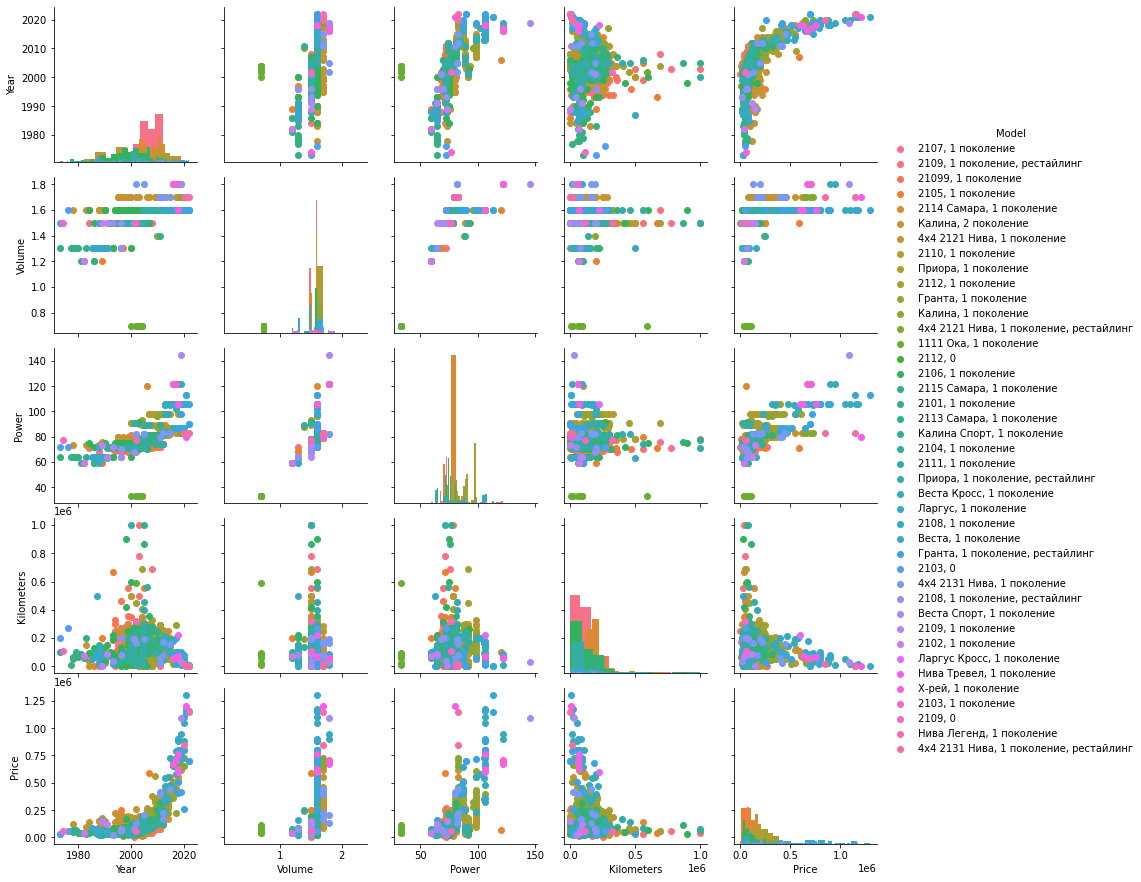

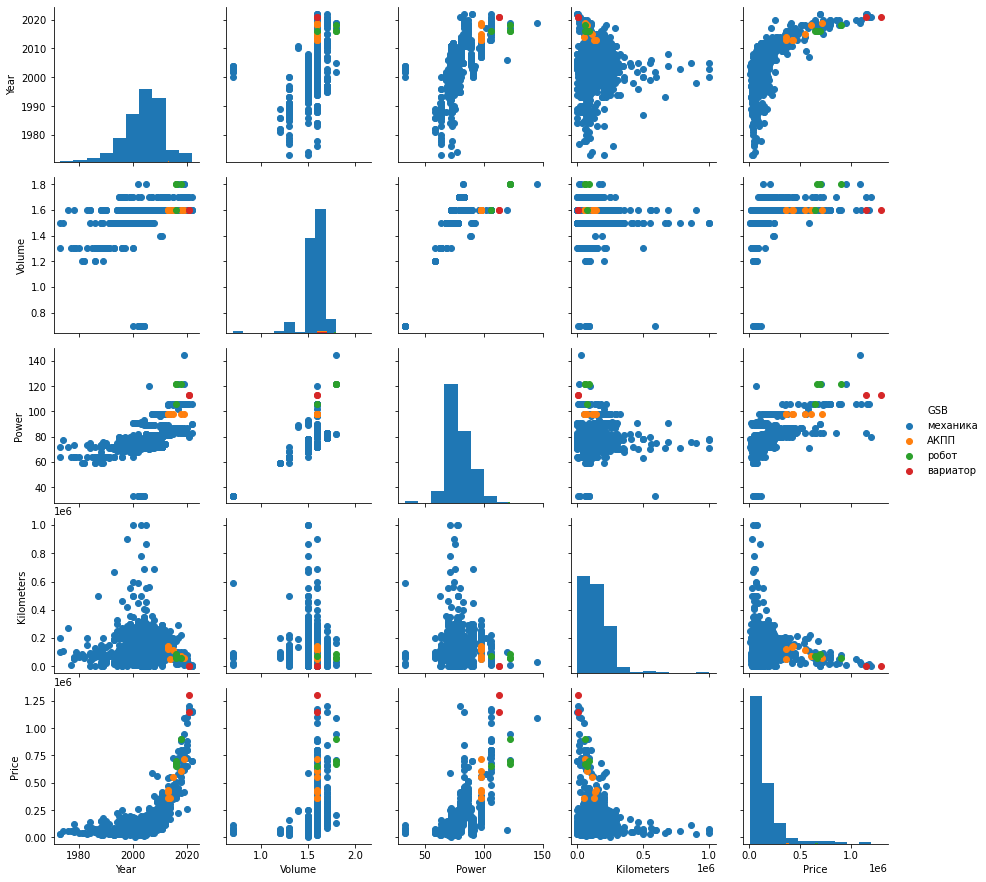

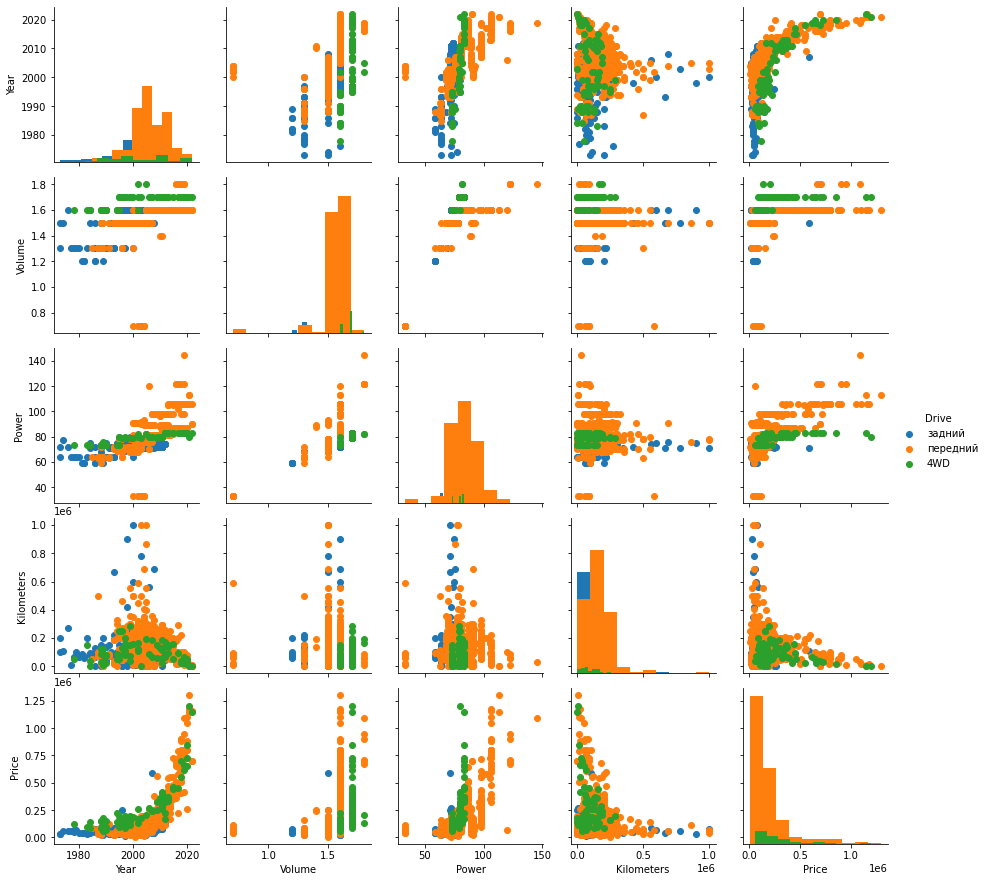

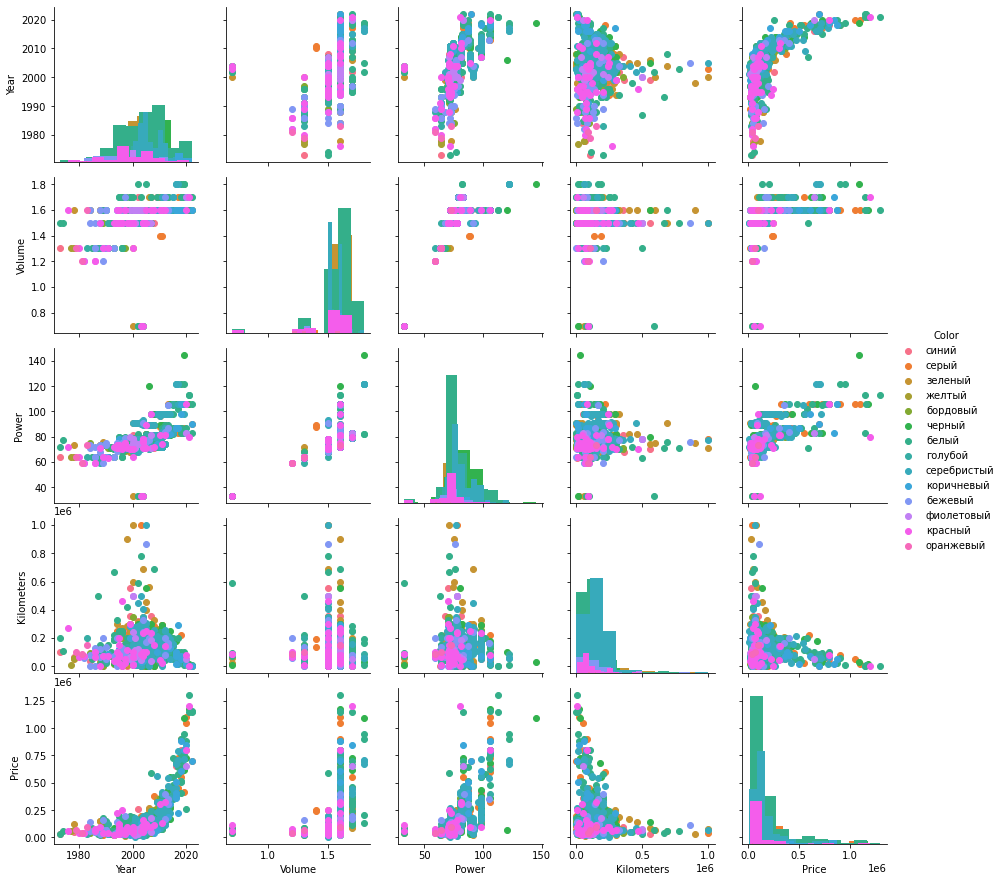

In [18]:
for i in categorial_features:
    g = sns.PairGrid(train_data[['Year', 'Volume', 'Power', 'Kilometers', 'Price', i]], hue=i)
    g.map_diag (plt.hist)
    g.map_offdiag (plt.scatter)
    g.add_legend()

#### Приведение категориальных данных к бинарной форме

In [112]:
X_train = np.hstack([train_data[real_features], train_cat])
X_train.shape

(957, 66)

#### Обучение модели

In [113]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, train_data[target_feature])  # обучаем

LinearRegression()

In [114]:
model.coef_

array([ 9.39446963e+03, -1.33132681e+05,  1.40651915e+03, -8.59956685e-02,
       -2.39004570e+05,  3.44264652e+04,  1.91134308e+03,  1.17325621e+05,
        1.16038948e+05, -1.08748887e+05, -9.48569432e+04, -8.46884635e+04,
       -1.23894016e+05, -7.65160541e+04, -1.40234960e+05, -1.65636855e+05,
       -2.05972983e+03, -1.56328713e+05, -1.44168311e+05, -1.65919455e+05,
       -1.57641120e+05, -1.96366712e+05, -1.74677078e+05, -1.70113682e+05,
       -1.59454702e+05, -1.52141503e+05, -3.17977311e+05, -5.16456972e+04,
       -3.43697679e+05,  1.08908410e+05,  5.30633483e+05,  6.05996161e+05,
        3.80347909e+05, -5.93806981e+04,  1.06979534e+05, -1.34296324e+05,
       -7.98985542e+04,  7.30237632e+04,  1.59881735e+05,  2.32536125e+05,
        3.88869002e+05,  4.49020645e+05, -9.31489610e+04, -3.33265840e+02,
        2.86931103e+05,  1.64526461e+04,  2.61957364e+05, -9.96825954e+04,
       -1.78727414e+05,  2.33477368e+05, -1.42485933e+05, -9.09914349e+04,
       -1.57597787e+03,  

In [115]:
model.intercept_

-18260467.82891132

#### Построение прогноза

In [116]:
train_preds = model.predict(X_train)
R2_score = sl.metrics.r2_score(train_data['Price'], train_preds)
R2_score

0.8962543630282171

In [129]:
print(sl.metrics.explained_variance_score(train_data['Price'], train_preds))
print(sl.metrics.max_error(train_data['Price'], train_preds))
print(sl.metrics.mean_absolute_error(train_data['Price'], train_preds))
print(sl.metrics.mean_squared_error(train_data['Price'], train_preds))
print(sl.metrics.median_absolute_error(train_data['Price'], train_preds))
print(sl.metrics.mean_absolute_percentage_error(train_data['Price'], train_preds))

0.8962543630282171
439890.6255954653
39609.49159325829
3275263891.277707
28718.287381596863
0.4180010007341933


In [24]:
train_data['Pred_Price'] = train_preds
train_data['Price_Delta'] = train_data['Price'] - train_data['Pred_Price']
train_data['Price_Delta_Percent'] = train_data['Price_Delta'] * 100 / train_data['Price']

In [25]:
train_data

,Model,Year,Volume,Power,GSB,Drive,Color,Kilometers,Price,Pred_Price,Price_Delta,Price_Delta_Percent
0,"2107, 1 поколение",2005.0,1.6,74.0,механика,задний,синий,25000.0,35000.0,8.126765e+04,-46267.645617,-1.321933e+02
1,"2109, 1 поколение, рестайлинг",2004.0,1.5,78.0,механика,передний,серый,160000.0,110000.0,1.313574e+05,-21357.448983,-1.941586e+01
2,"21099, 1 поколение",2000.0,1.5,70.0,механика,передний,зеленый,230000.0,50000.0,6.612617e+04,-16126.169782,-3.225234e+01
3,"2105, 1 поколение",1996.0,1.5,71.0,механика,задний,зеленый,65000.0,42000.0,4.196096e+04,39.035256,9.294108e-02
4,"2114 Самара, 1 поколение",2004.0,1.5,77.0,механика,передний,желтый,200000.0,70000.0,9.849409e+04,-28494.094937,-4.070585e+01
...,...,...,...,...,...,...,...,...,...,...,...,...
1010,"2114 Самара, 1 поколение",2010.0,1.6,81.0,механика,передний,белый,81220.0,279000.0,1.679895e+05,111010.480900,3.978870e+01
1011,"4x4 2131 Нива, 1 поколение",2005.0,1.8,82.0,механика,4WD,белый,190066.0,205000.0,2.266627e+05,-21662.695192,-1.056717e+01
1012,"4x4 2131 Нива, 1 поколение, рестайлинг",2020.0,1.7,83.0,механика,4WD,коричневый,16500.0,850000.0,8.500000e+05,0.000005,6.420647e-10
1013,"Веста, 1 поколение",2021.0,1.6,113.0,вариатор,передний,белый,3150.0,1150000.0,1.224494e+06,-74493.550320,-6.477700e+00


#### Визуализация

In [26]:
visual_data = train_data.sort_values('Pred_Price')
visual_data = visual_data.reset_index(drop=True)

In [27]:
visual_data

,Model,Year,Volume,Power,GSB,Drive,Color,Kilometers,Price,Pred_Price,Price_Delta,Price_Delta_Percent
0,"2107, 1 поколение",1984.0,1.5,71.0,механика,задний,бежевый,77285.0,55000.0,-9.596094e+04,150960.937241,2.744744e+02
1,"2107, 1 поколение",1988.0,1.5,68.0,механика,задний,бежевый,66180.0,35000.0,-6.164763e+04,96647.634277,2.761361e+02
2,"2106, 1 поколение",1984.0,1.6,75.0,механика,задний,бордовый,97112.0,40000.0,-6.084193e+04,100841.926313,2.521048e+02
3,"2107, 1 поколение",1988.0,1.5,71.0,механика,задний,красный,1000.0,95000.0,-4.456641e+04,139566.414837,1.469120e+02
4,"2101, 1 поколение",1973.0,1.3,64.0,механика,задний,синий,100000.0,36000.0,-4.160996e+04,77609.963603,2.155832e+02
...,...,...,...,...,...,...,...,...,...,...,...,...
952,"Веста Спорт, 1 поколение",2019.0,1.8,145.0,механика,передний,черный,28000.0,1090000.0,1.090000e+06,0.000004,3.253648e-10
953,"Нива Легенд, 1 поколение",2022.0,1.7,83.0,механика,4WD,белый,0.0,1150000.0,1.150000e+06,-0.000004,-3.751205e-10
954,"Нива Тревел, 1 поколение",2021.0,1.7,80.0,механика,4WD,красный,5200.0,1200000.0,1.200000e+06,0.000007,5.752469e-10
955,"Веста, 1 поколение",2021.0,1.6,113.0,вариатор,передний,белый,3150.0,1150000.0,1.224494e+06,-74493.550320,-6.477700e+00


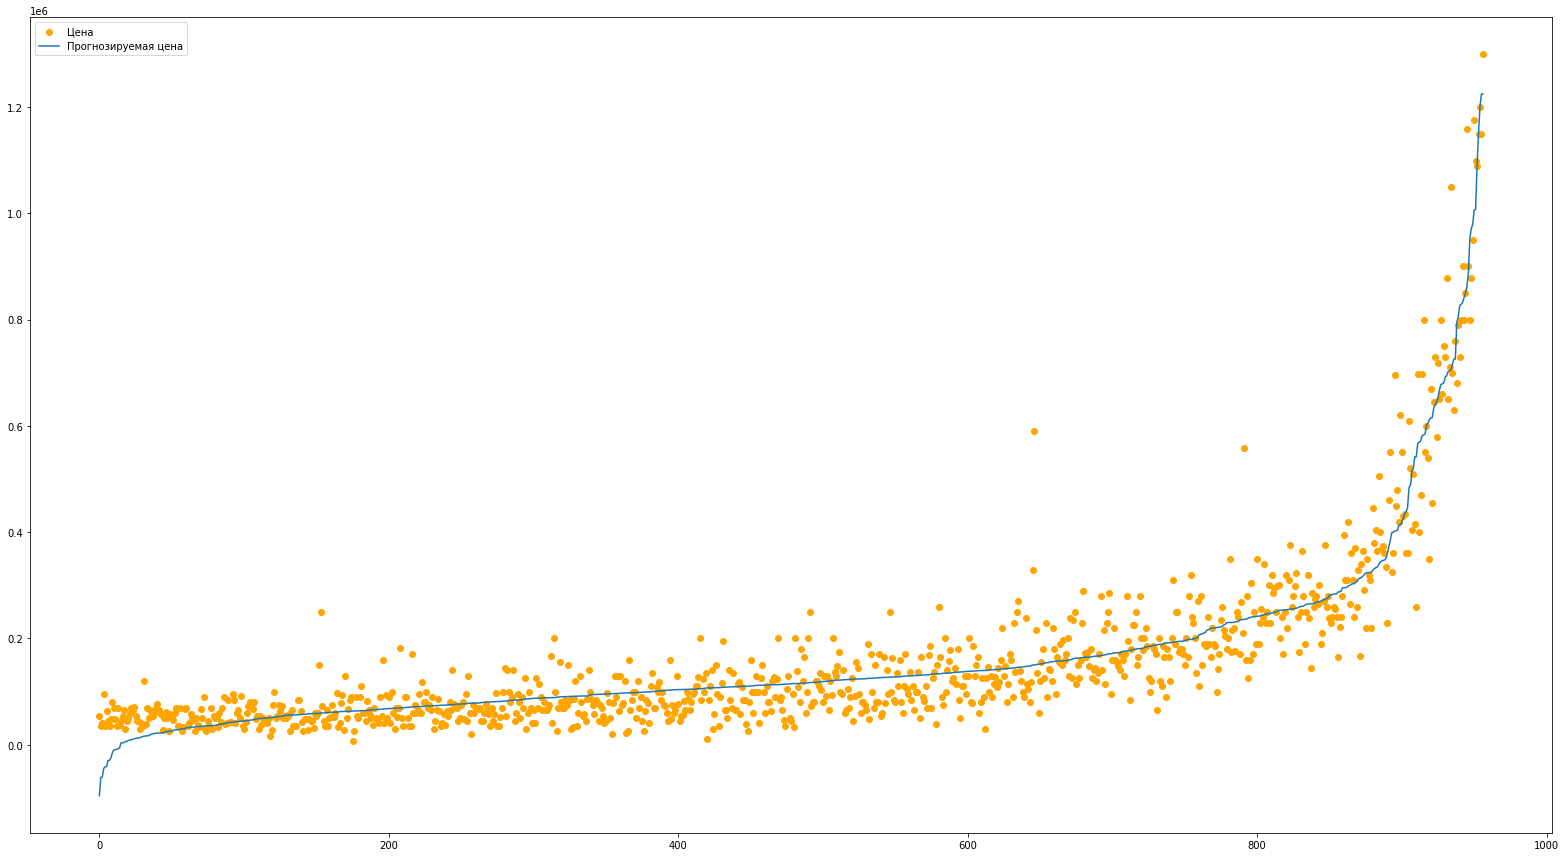

In [28]:
fig = plt.figure(figsize=(60, 15))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.scatter(visual_data.index, visual_data['Price'], label='Цена', color='orange')
ax.plot(visual_data.index, visual_data['Pred_Price'], label='Прогнозируемая цена')
ax.legend()

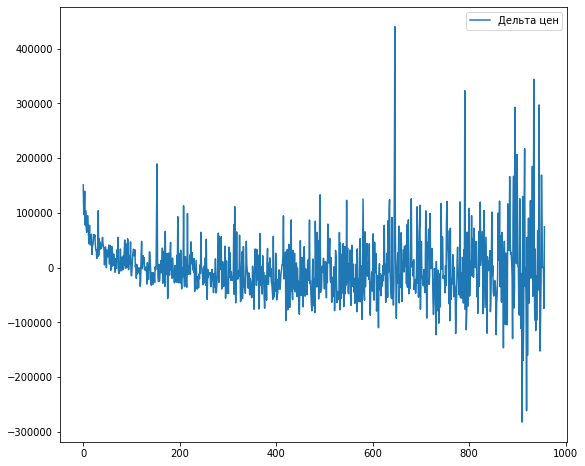

In [29]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(visual_data['Price_Delta'], label='Дельта цен')
ax.legend()

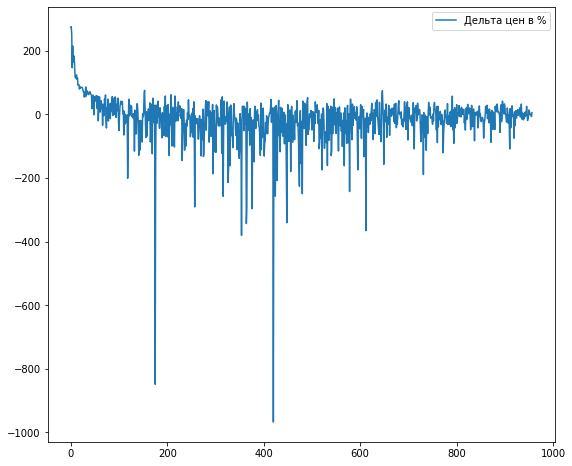

In [30]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(visual_data['Price_Delta_Percent'], label='Дельта цен в %')
ax.legend()

### Тестовые данные

#### Представление тестовых данных

In [31]:
test_data

,Model,Year,Volume,Power,GSB,Drive,Color,Kilometers,Price
0,"2114 Самара, 1 поколение",2009.0,1.6,81.0,механика,передний,черный,209600.0,140000.0
1,"Приора, 1 поколение",2008.0,1.6,98.0,механика,передний,серебристый,110000.0,289000.0
2,"2101, 1 поколение",1981.0,1.2,59.0,механика,задний,бежевый,500.0,20000.0
3,"1111 Ока, 1 поколение",2004.0,0.7,33.0,механика,передний,синий,150000.0,45000.0
4,"4x4 2121 Нива, 1 поколение",2012.0,1.7,83.0,механика,4WD,синий,81000.0,399000.0
...,...,...,...,...,...,...,...,...,...
1347,"2104, 1 поколение",2000.0,1.5,71.0,механика,задний,белый,200000.0,69999.0
1348,"Веста Кросс, 1 поколение",2021.0,1.6,113.0,вариатор,передний,оранжевый,27000.0,1220000.0
1349,"2104, 1 поколение",2011.0,1.6,74.0,механика,задний,зеленый,80000.0,173000.0
1350,"2114 Самара, 1 поколение",2012.0,1.6,81.0,механика,передний,серый,113000.0,230000.0


In [32]:
test_data.to_csv('ТестовоеМножество.csv')

#### Граифики и корреляции

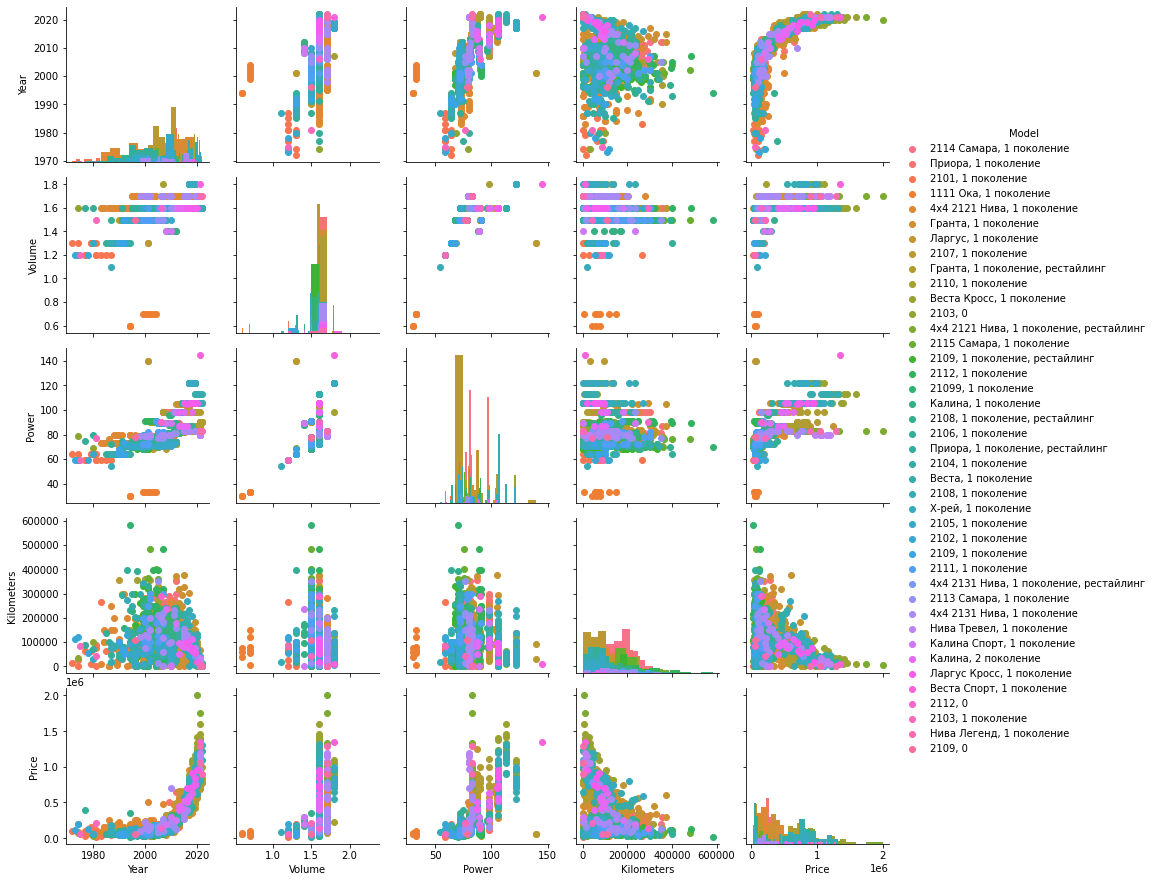

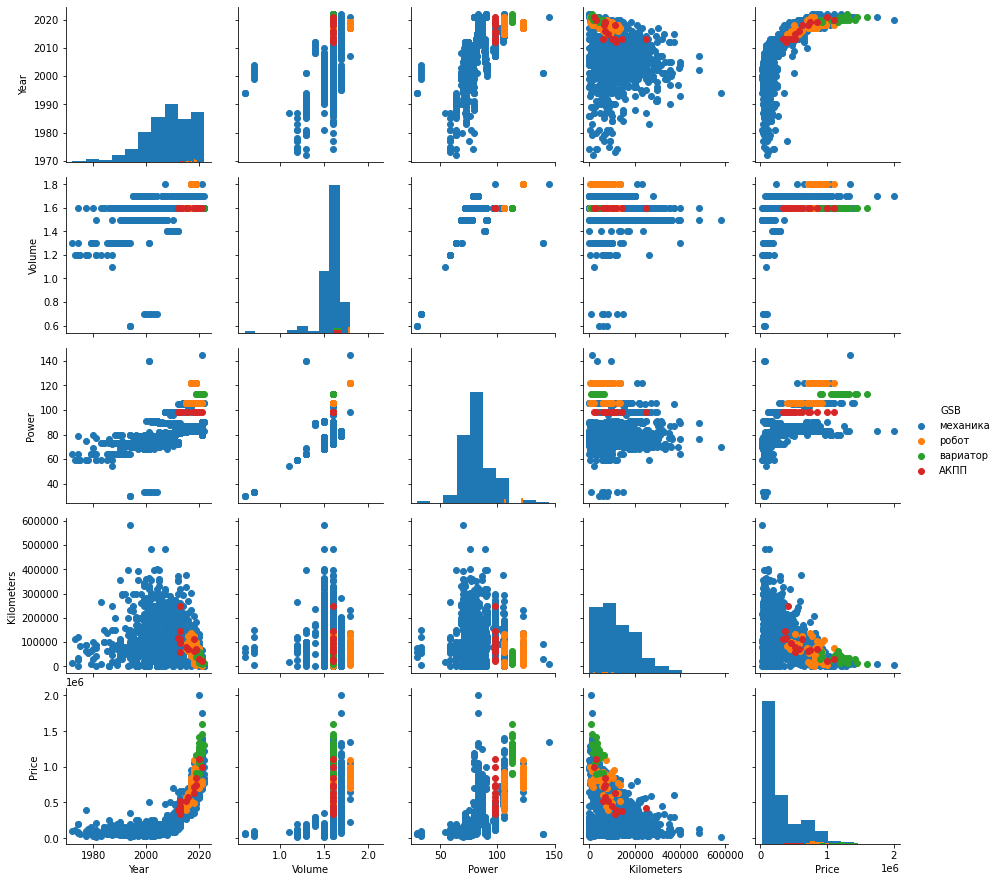

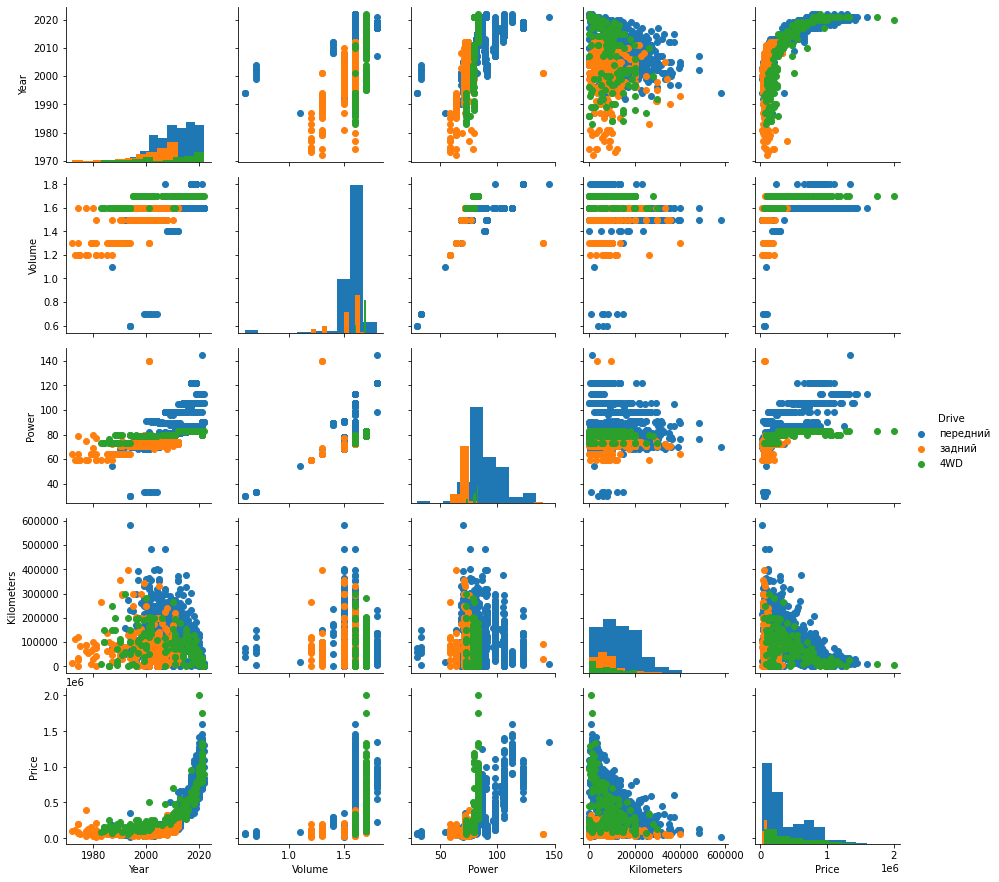

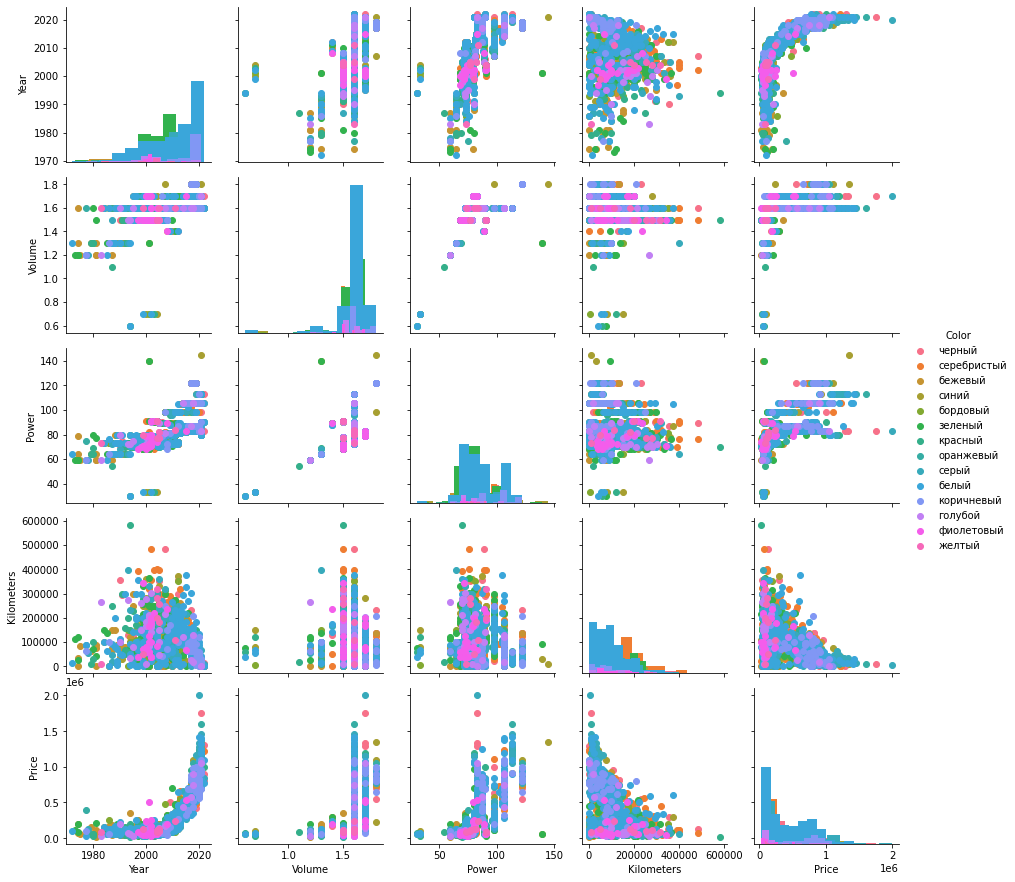

In [33]:
for i in categorial_features:
    g = sns.PairGrid(test_data[['Year', 'Volume', 'Power', 'Kilometers', 'Price', i]], hue=i)
    g.map_diag (plt.hist)
    g.map_offdiag (plt.scatter)
    g.add_legend()

#### Приведение категориальных признаков к бинарной форме

In [34]:
X_test = np.hstack([test_data[real_features], test_cat])
X_test.shape

(1247, 66)

#### Построение прогноза

In [35]:
test_preds = model.predict(X_test)
R2_score = sl.metrics.r2_score(test_data['Price'], test_preds)
R2_score

0.8668110817759808

In [130]:
print(sl.metrics.explained_variance_score(test_data['Price'], test_preds))
print(sl.metrics.max_error(test_data['Price'], test_preds))
print(sl.metrics.mean_absolute_error(test_data['Price'], test_preds))
print(sl.metrics.mean_squared_error(test_data['Price'], test_preds))
print(sl.metrics.median_absolute_error(test_data['Price'], test_preds))
print(sl.metrics.mean_absolute_percentage_error(test_data['Price'], test_preds))

0.875694916390147
1295572.8231712617
71437.95677090656
13332119355.045282
42786.23491101712
0.30474556551256177


In [131]:
test_data['Pred_Price'] = test_preds
test_data['Price_Delta'] = test_data['Price'] - test_data['Pred_Price']
test_data['Price_Delta_Percent'] = test_data['Price_Delta'] * 100 / test_data['Price']
test_data

,Model,Year,Volume,Power,GSB,Drive,Color,Kilometers,Price,Pred_Price,Price_Delta,Price_Delta_Percent
0,"2114 Самара, 1 поколение",2009.0,1.6,81.0,механика,передний,черный,209600.0,140000.0,1.515969e+05,-11596.937231,-8.283527
1,"Приора, 1 поколение",2008.0,1.6,98.0,механика,передний,серебристый,110000.0,289000.0,2.274577e+05,61542.282173,21.294907
2,"2101, 1 поколение",1981.0,1.2,59.0,механика,задний,бежевый,500.0,20000.0,6.384089e+04,-43840.887122,-219.204436
3,"1111 Ока, 1 поколение",2004.0,0.7,33.0,механика,передний,синий,150000.0,45000.0,5.965979e+04,-14659.790071,-32.577311
4,"4x4 2121 Нива, 1 поколение",2012.0,1.7,83.0,механика,4WD,синий,81000.0,399000.0,3.234386e+05,75561.413687,18.937698
...,...,...,...,...,...,...,...,...,...,...,...,...
1347,"2104, 1 поколение",2000.0,1.5,71.0,механика,задний,белый,200000.0,69999.0,6.228965e+04,7709.349740,11.013514
1348,"Веста Кросс, 1 поколение",2021.0,1.6,113.0,вариатор,передний,оранжевый,27000.0,1220000.0,1.392954e+06,-172953.560720,-14.176521
1349,"2104, 1 поколение",2011.0,1.6,74.0,механика,задний,зеленый,80000.0,173000.0,1.586024e+05,14397.580474,8.322301
1350,"2114 Самара, 1 поколение",2012.0,1.6,81.0,механика,передний,серый,113000.0,230000.0,1.983353e+05,31664.697245,13.767260


#### Визуализация

In [132]:
visual_data = test_data.sort_values('Pred_Price')
visual_data = visual_data.reset_index(drop=True)

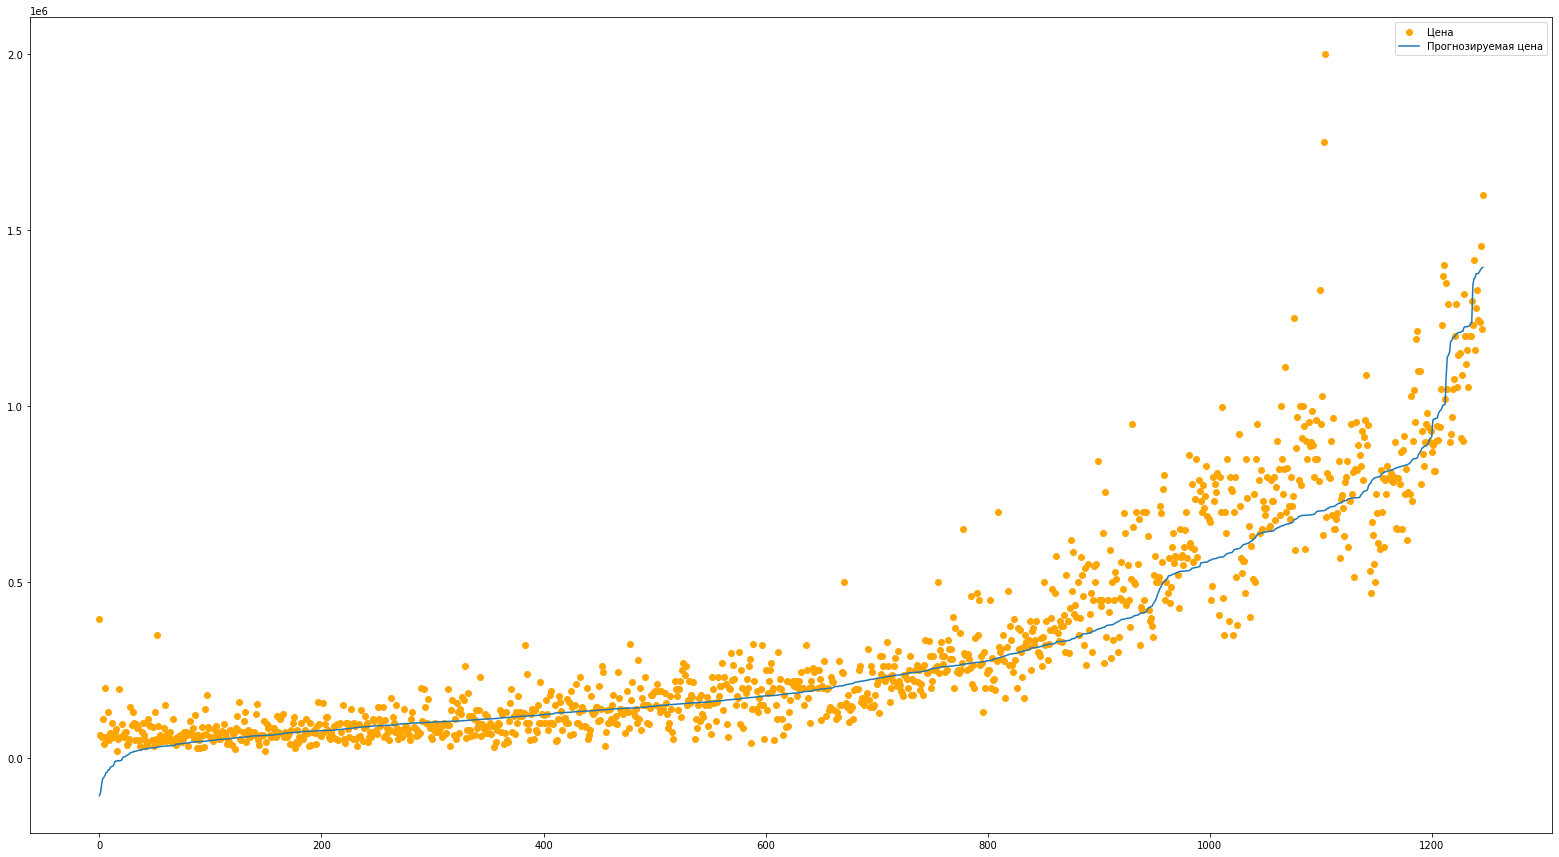

In [133]:
fig = plt.figure(figsize=(60, 15))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.scatter(visual_data.index, visual_data['Price'], label='Цена', color='orange')
ax.plot(visual_data.index, visual_data['Pred_Price'], label='Прогнозируемая цена')
ax.legend()

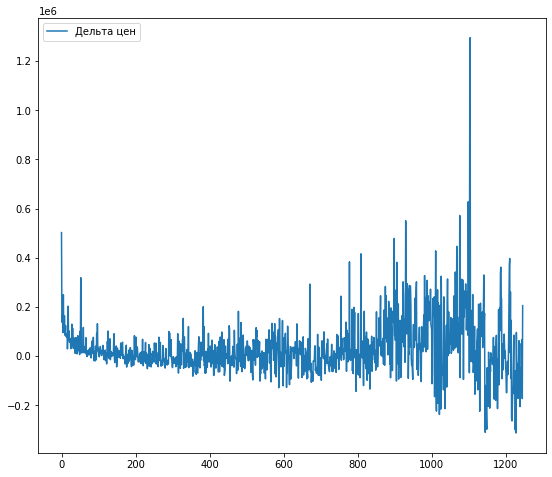

In [39]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(visual_data['Price_Delta'], label='Дельта цен')
ax.legend()

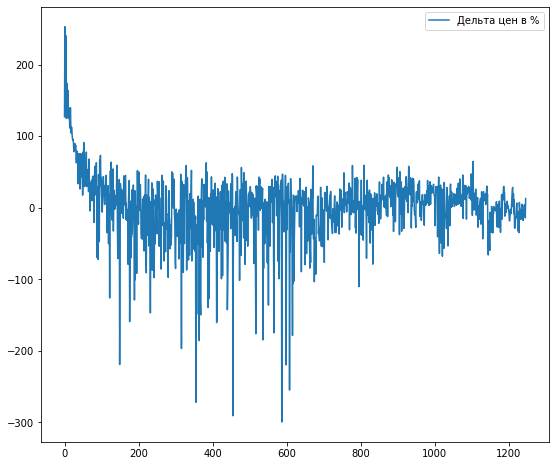

In [40]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(visual_data['Price_Delta_Percent'], label='Дельта цен в %')
ax.legend()

## Нейронная сеть

### Тренировочные данные

#### Обучение модели

In [41]:
# Про нейросети нужно побольше изучить теории, методом тыка в данном случае не вышло :c

In [42]:
# s = []
# l = []
# for i in range(1, 10):
a = (66, 66,)
model = MLPRegressor(
                    hidden_layer_sizes=a,
                    # activation=,
                    # solver=,
                    # alpha=,
                    # batch_size=,
                    # learning_rate=,
                    # power_t=,
                    max_iter=1000
                    # shuffle=,
                    # random_state=,
                    # tol=,
                    # verbose=,
                    # warm_start=,
                    # momentum=,
                    # nesterovs_momentum=,
                    # early_stopping=,
                    # validation_fraction=,
                    # beta_1=,
                    # beta_2=,
                    # epsilon=,
                    # n_iter_no_change=,
                    # max_fun=
)
model.fit(X_train, train_data[target_feature])
MLP_prediction = model.predict(X_train)
R2_score = sl.metrics.r2_score(train_data['Price'], MLP_prediction)
R2_score
# s.append((R2_score, a))
# l.append(R2_score)

0.06391442865545793

In [43]:
model.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (66, 66),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [44]:
MLP_prediction = model.predict(X_train)

In [45]:
R2_score = sl.metrics.r2_score(train_data['Price'],MLP_prediction)
R2_score

0.06391442865545793

In [46]:
train_data['Pred_Price'] = MLP_prediction
train_data['Price_Delta'] = train_data['Price'] - train_data['Pred_Price']
train_data['Price_Delta_Percent'] = train_data['Price_Delta'] * 100 / train_data['Price']

#### Визуализация

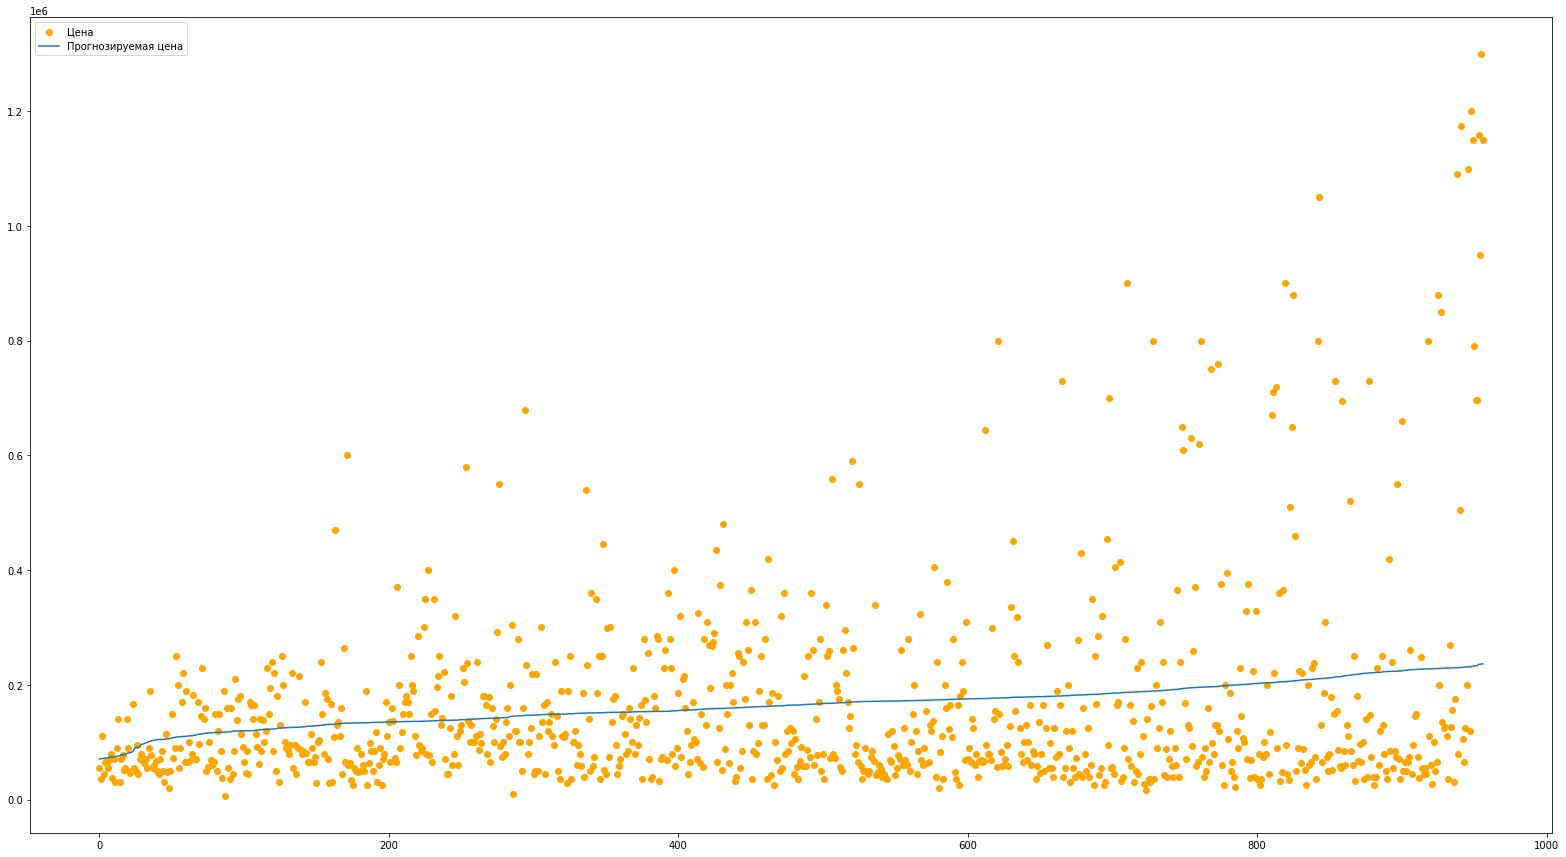

In [47]:
visual_data = train_data.sort_values('Pred_Price')
visual_data = visual_data.reset_index(drop=True)
fig = plt.figure(figsize=(60, 15))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.scatter(visual_data.index, visual_data['Price'], label='Цена', color='orange')
ax.plot(visual_data.index, visual_data['Pred_Price'], label='Прогнозируемая цена')
ax.legend()

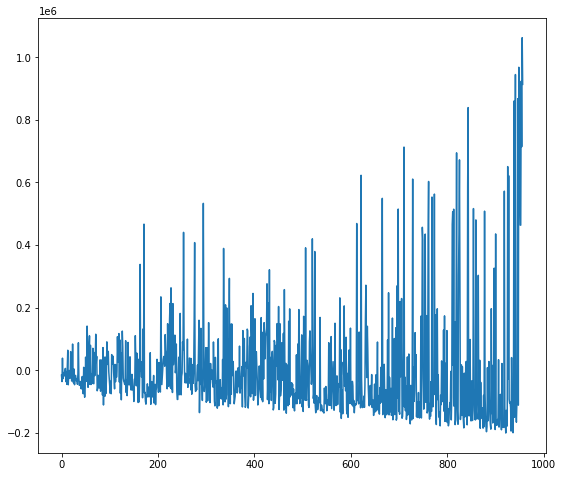

In [48]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(visual_data['Price_Delta'])

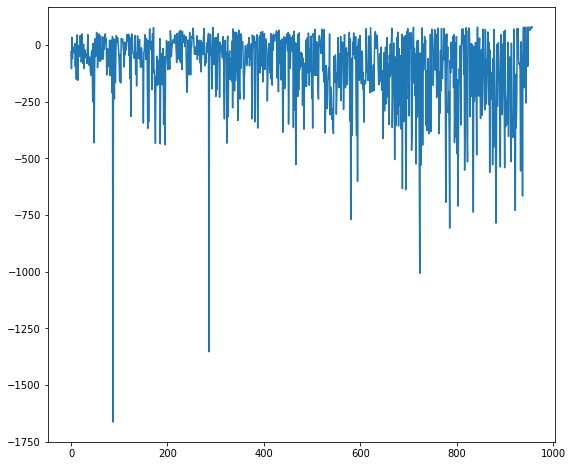

In [49]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(visual_data['Price_Delta_Percent'])

### Тестовые данные

#### Прогнозирование

In [50]:
MLP_prediction = model.predict(X_test)

In [51]:
test_data['Pred_Price'] = MLP_prediction
test_data['Price_Delta'] = test_data['Price'] - test_data['Pred_Price']
test_data['Price_Delta_Percent'] = test_data['Price_Delta'] * 100 / test_data['Price']

#### Визуализация

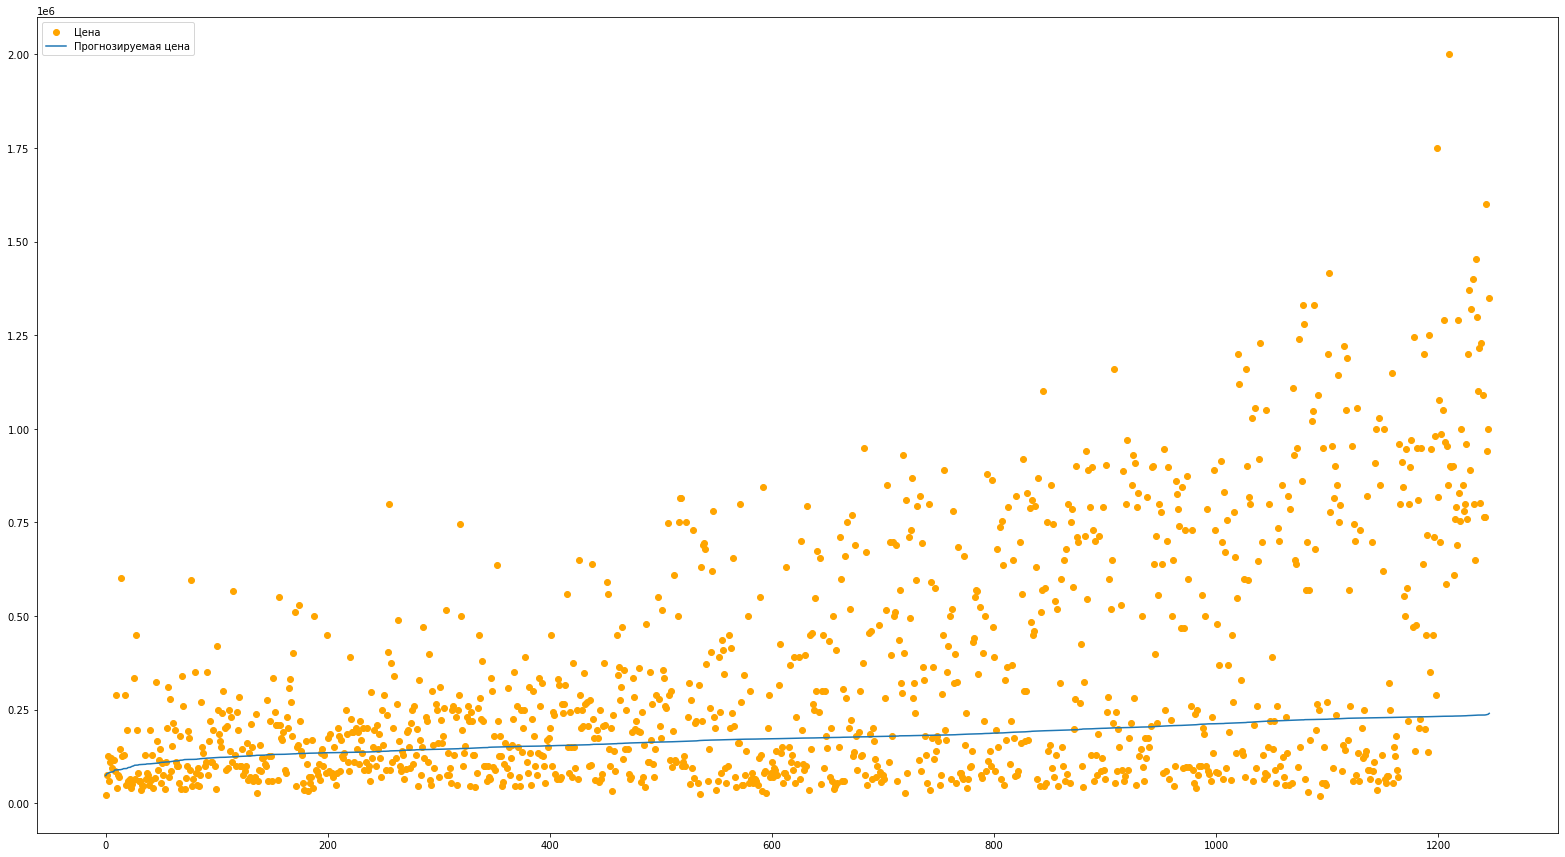

In [52]:
visual_data = test_data.sort_values('Pred_Price')
visual_data = visual_data.reset_index(drop=True)
fig = plt.figure(figsize=(60, 15))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.scatter(visual_data.index, visual_data['Price'], label='Цена', color='orange')
ax.plot(visual_data.index, visual_data['Pred_Price'], label='Прогнозируемая цена')
ax.legend()

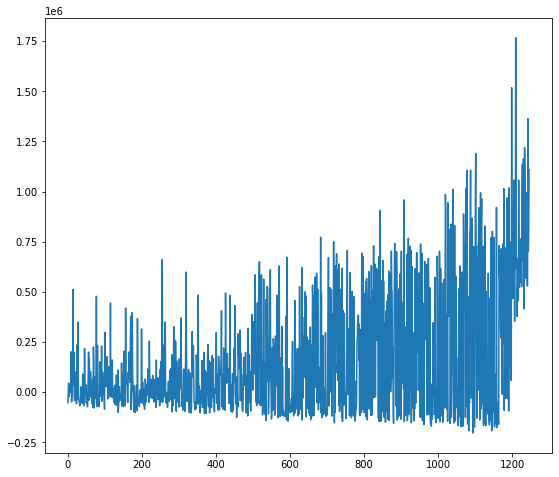

In [53]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(visual_data['Price_Delta'])

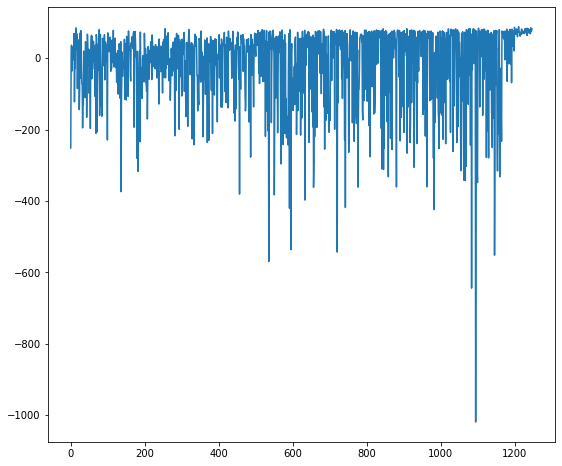

In [54]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(visual_data['Price_Delta_Percent'])

## Дерево решений

### Тренировочные данные

#### Обучение модели

In [55]:
model = DecisionTreeRegressor()
model.fit(X_train, train_data[target_feature])
Tree_Prediction = model.predict(X_train)
R2_score = sl.metrics.r2_score(train_data['Price'], Tree_Prediction)
R2_score

0.999127831360371

In [56]:
train_data['Pred_Price'] = Tree_Prediction
train_data['Price_Delta'] = train_data['Price'] - train_data['Pred_Price']
train_data['Price_Delta_Percent'] = train_data['Price_Delta'] * 100 / train_data['Price']
train_data

,Model,Year,Volume,Power,GSB,Drive,Color,Kilometers,Price,Pred_Price,Price_Delta,Price_Delta_Percent
0,"2107, 1 поколение",2005.0,1.6,74.0,механика,задний,синий,25000.0,35000.0,35000.0,0.0,0.0
1,"2109, 1 поколение, рестайлинг",2004.0,1.5,78.0,механика,передний,серый,160000.0,110000.0,110000.0,0.0,0.0
2,"21099, 1 поколение",2000.0,1.5,70.0,механика,передний,зеленый,230000.0,50000.0,50000.0,0.0,0.0
3,"2105, 1 поколение",1996.0,1.5,71.0,механика,задний,зеленый,65000.0,42000.0,42000.0,0.0,0.0
4,"2114 Самара, 1 поколение",2004.0,1.5,77.0,механика,передний,желтый,200000.0,70000.0,70000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1010,"2114 Самара, 1 поколение",2010.0,1.6,81.0,механика,передний,белый,81220.0,279000.0,279000.0,0.0,0.0
1011,"4x4 2131 Нива, 1 поколение",2005.0,1.8,82.0,механика,4WD,белый,190066.0,205000.0,205000.0,0.0,0.0
1012,"4x4 2131 Нива, 1 поколение, рестайлинг",2020.0,1.7,83.0,механика,4WD,коричневый,16500.0,850000.0,850000.0,0.0,0.0
1013,"Веста, 1 поколение",2021.0,1.6,113.0,вариатор,передний,белый,3150.0,1150000.0,1150000.0,0.0,0.0


#### Визуализация

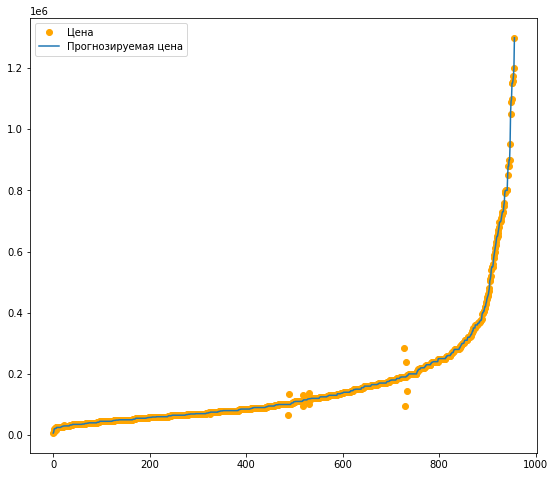

In [57]:
visual_data = train_data.sort_values('Pred_Price')
visual_data = visual_data.reset_index(drop=True)
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.scatter(visual_data.index, visual_data['Price'], label='Цена', color='orange')
ax.plot(visual_data.index, visual_data['Pred_Price'], label='Прогнозируемая цена')
ax.legend()

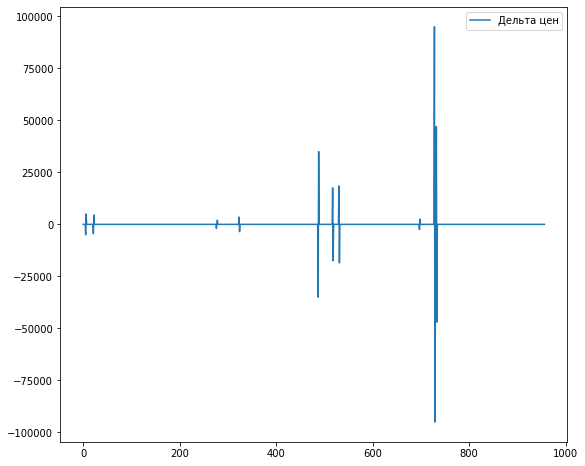

In [58]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(visual_data['Price_Delta'], label='Дельта цен')
ax.legend()

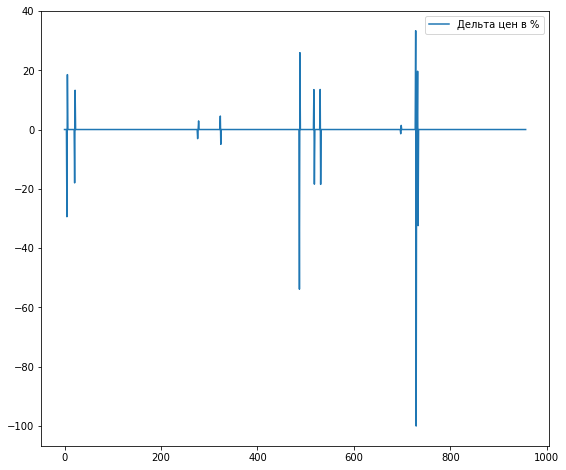

In [59]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(visual_data['Price_Delta_Percent'], label='Дельта цен в %')
ax.legend()

### Тестовые данные

#### Прогнозирование

In [60]:
Tree_Prediction = model.predict(X_test)
R2_score = sl.metrics.r2_score(test_data['Price'], Tree_Prediction)
R2_score

0.8449349382754785

In [61]:
test_data['Pred_Price'] = Tree_Prediction
test_data['Price_Delta'] = test_data['Price'] - test_data['Pred_Price']
test_data['Price_Delta_Percent'] = test_data['Price_Delta'] * 100 / test_data['Price']

#### Визуализация

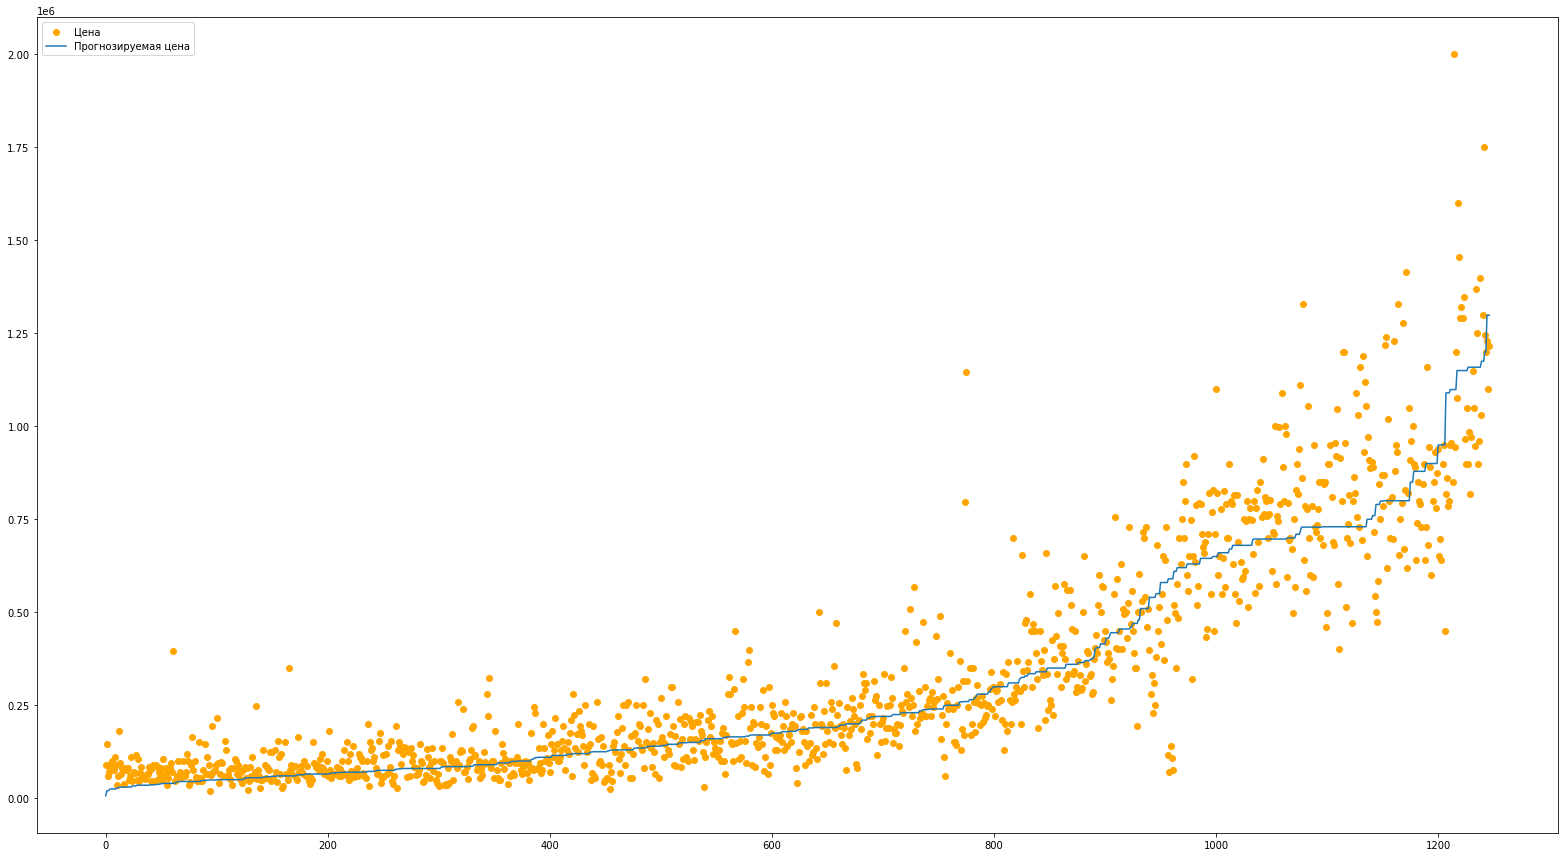

In [62]:
visual_data = test_data.sort_values('Pred_Price')
visual_data = visual_data.reset_index(drop=True)
fig = plt.figure(figsize=(60, 15))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.scatter(visual_data.index, visual_data['Price'], label='Цена', color='orange')
ax.plot(visual_data.index, visual_data['Pred_Price'], label='Прогнозируемая цена')
ax.legend()

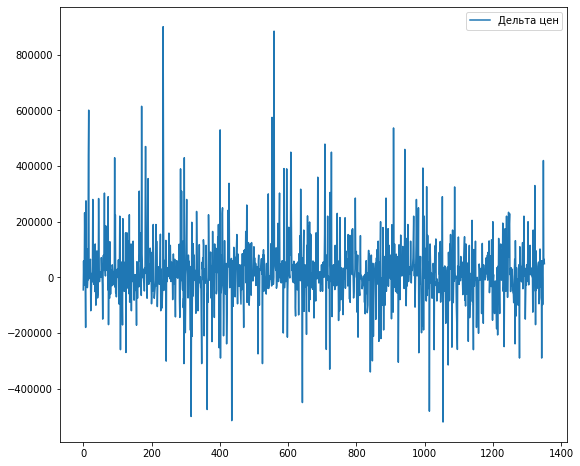

In [63]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(test_data['Price_Delta'], label='Дельта цен')
ax.legend()

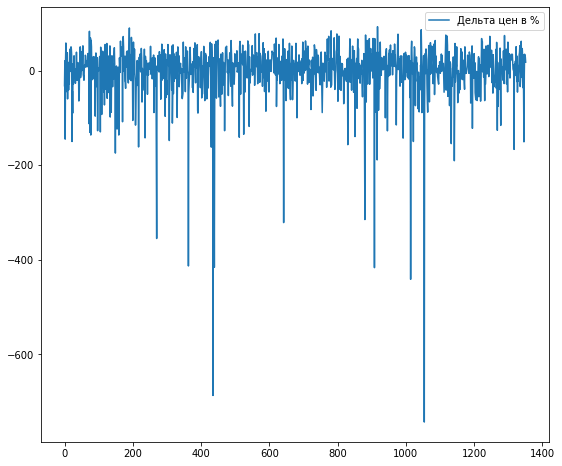

In [64]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(test_data['Price_Delta_Percent'], label='Дельта цен в %')
ax.legend()

## Регрессия LASSO

### Тренировочные данные

#### Обучение модели

In [65]:
model = LassoCV()
model.fit(X_train, train_data[target_feature])
Lasso_Prediction = model.predict(X_train)
R2_score = sl.metrics.r2_score(train_data['Price'], Lasso_Prediction)
R2_score

0.03345785298981163

In [66]:
train_data['Pred_Price'] = Lasso_Prediction
train_data['Price_Delta'] = train_data['Price'] - train_data['Pred_Price']
train_data['Price_Delta_Percent'] = train_data['Price_Delta'] * 100 / train_data['Price']

#### Визуализация

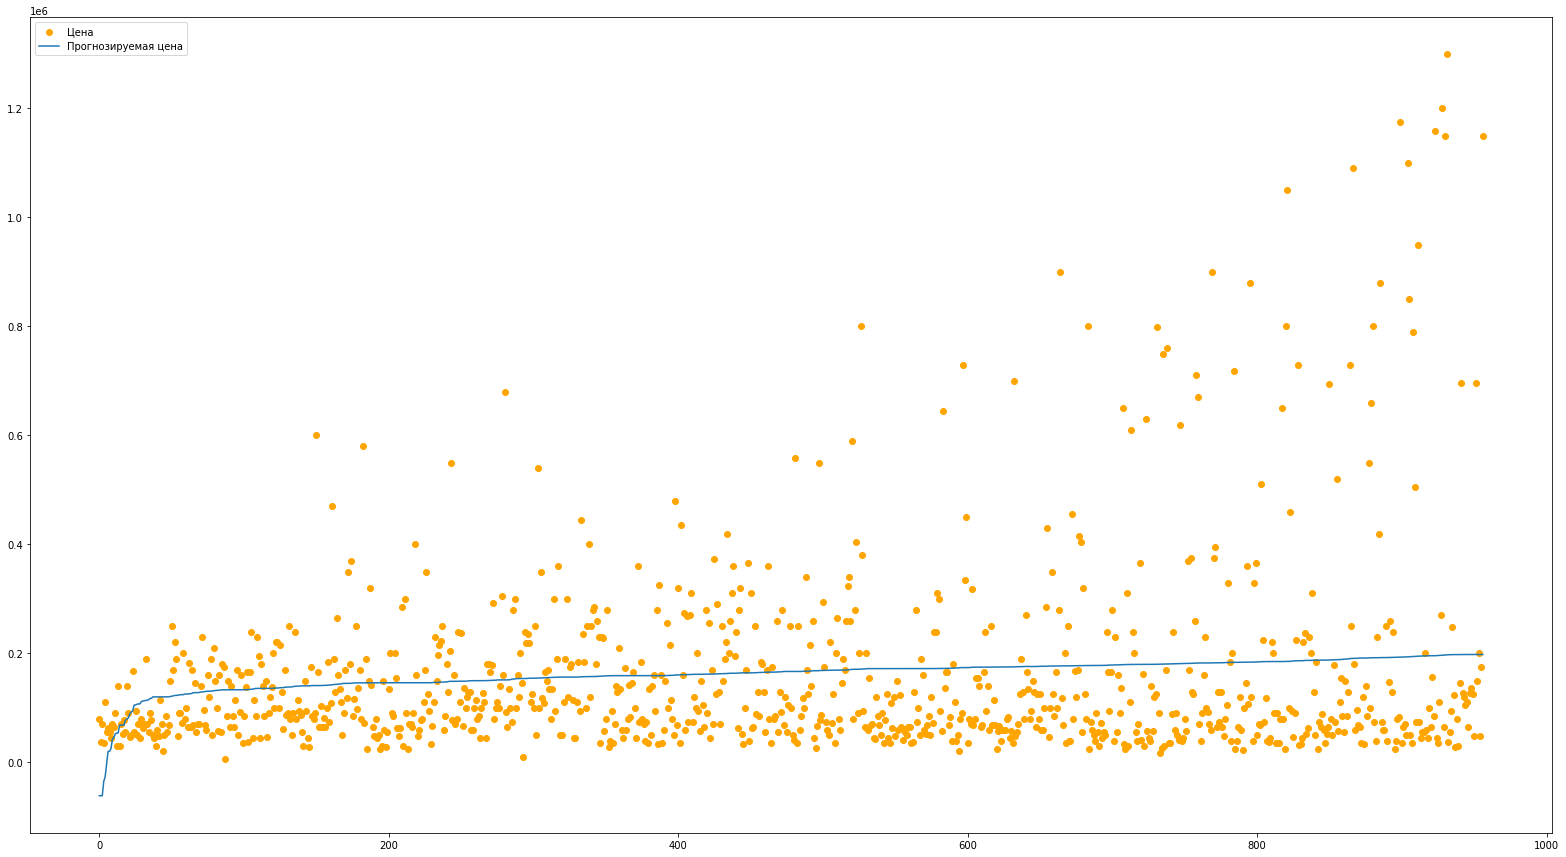

In [67]:
visual_data = train_data.sort_values('Pred_Price')
visual_data = visual_data.reset_index(drop=True)
fig = plt.figure(figsize=(60, 15))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.scatter(visual_data.index, visual_data['Price'], label='Цена', color='orange')
ax.plot(visual_data.index, visual_data['Pred_Price'], label='Прогнозируемая цена')
ax.legend()

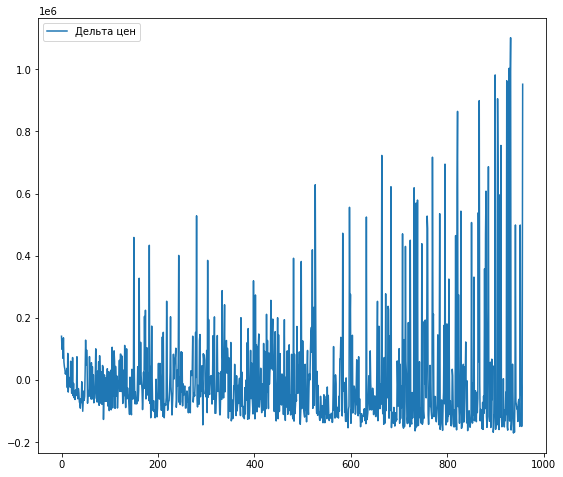

In [68]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(visual_data['Price_Delta'], label='Дельта цен')
ax.legend()

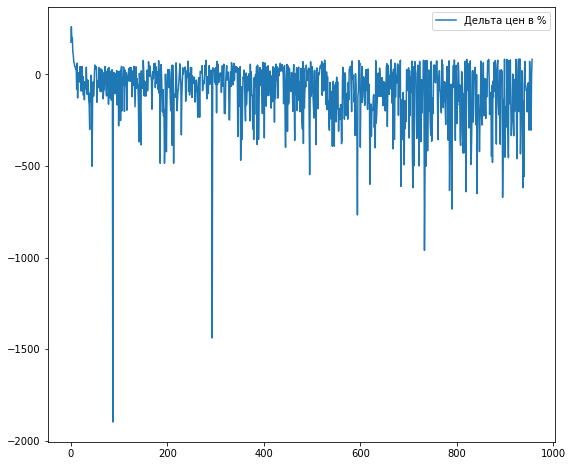

In [69]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(visual_data['Price_Delta_Percent'], label='Дельта цен в %')
ax.legend()

### Реальные данные

#### Прогнозирование

In [70]:
Lasso_Prediction = model.predict(X_test)
R2_score = sl.metrics.r2_score(test_data['Price'], Lasso_Prediction)
R2_score

-0.22000667775318217

In [71]:
test_data['Pred_Price'] = Lasso_Prediction
test_data['Price_Delta'] = test_data['Price'] - test_data['Pred_Price']
test_data['Price_Delta_Percent'] = test_data['Price_Delta'] * 100 / test_data['Price']

#### Визуализация

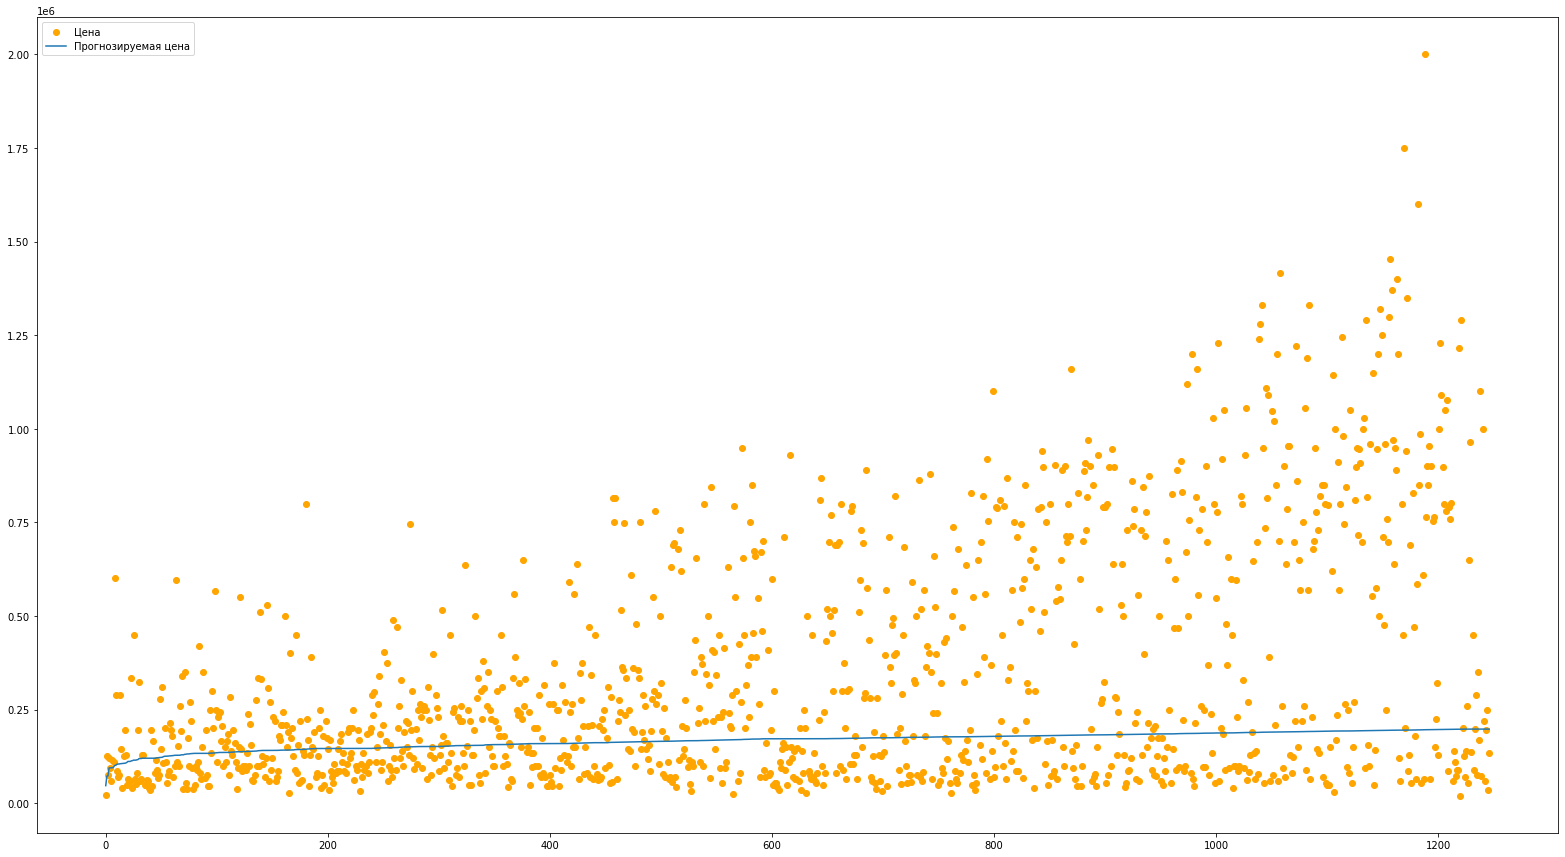

In [72]:
visual_data = test_data.sort_values('Pred_Price')
visual_data = visual_data.reset_index(drop=True)
fig = plt.figure(figsize=(60, 15))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.scatter(visual_data.index, visual_data['Price'], label='Цена', color='orange')
ax.plot(visual_data.index, visual_data['Pred_Price'], label='Прогнозируемая цена')
ax.legend()

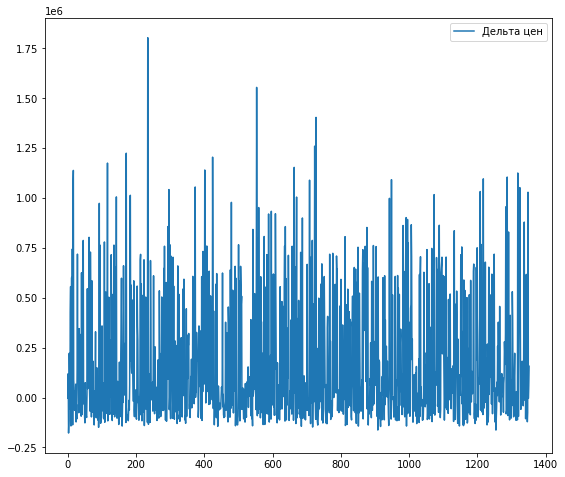

In [73]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(test_data['Price_Delta'], label='Дельта цен')
ax.legend()

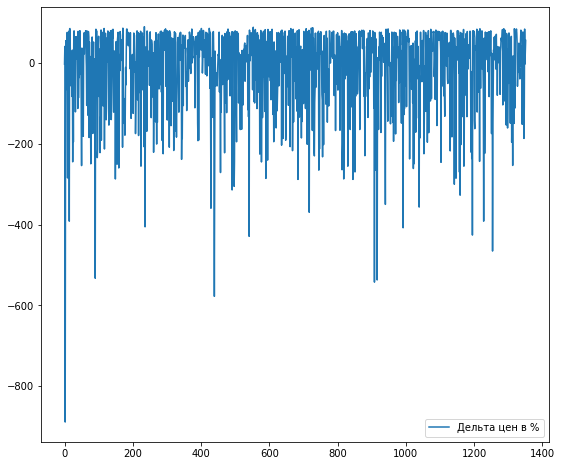

In [74]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(test_data['Price_Delta_Percent'], label='Дельта цен в %')
ax.legend()

## Регрессия Ridge

### Тренировочные данные

#### Обучение модели

In [75]:
model = RidgeCV()
model.fit(X_train, train_data[target_feature])
Ridge_Prediction = model.predict(X_train)
R2_score = sl.metrics.r2_score(train_data['Price'], Ridge_Prediction)
R2_score

0.8956191778246342

In [76]:
train_data['Pred_Price'] = Ridge_Prediction
train_data['Price_Delta'] = train_data['Price'] - train_data['Pred_Price']
train_data['Price_Delta_Percent'] = train_data['Price_Delta'] * 100 / train_data['Price']

#### Визуализация

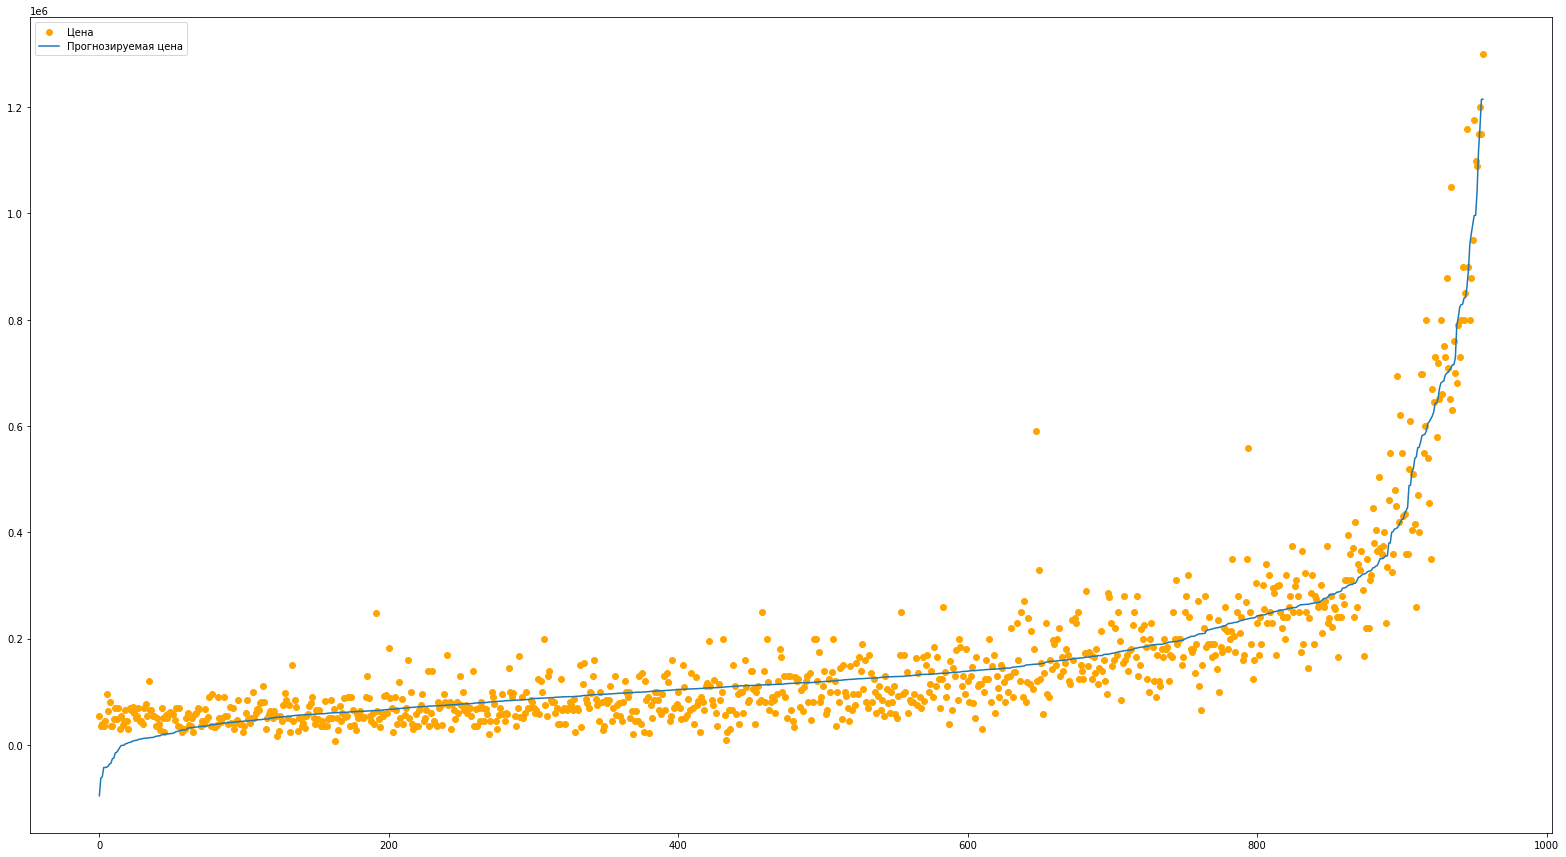

In [77]:
visual_data = train_data.sort_values('Pred_Price')
visual_data = visual_data.reset_index(drop=True)
fig = plt.figure(figsize=(60, 15))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.scatter(visual_data.index, visual_data['Price'], label='Цена', color='orange')
ax.plot(visual_data.index, visual_data['Pred_Price'], label='Прогнозируемая цена')
ax.legend()

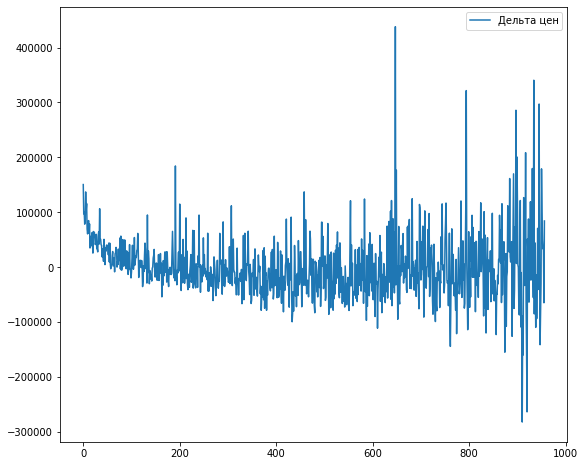

In [78]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(visual_data['Price_Delta'], label='Дельта цен')
ax.legend()

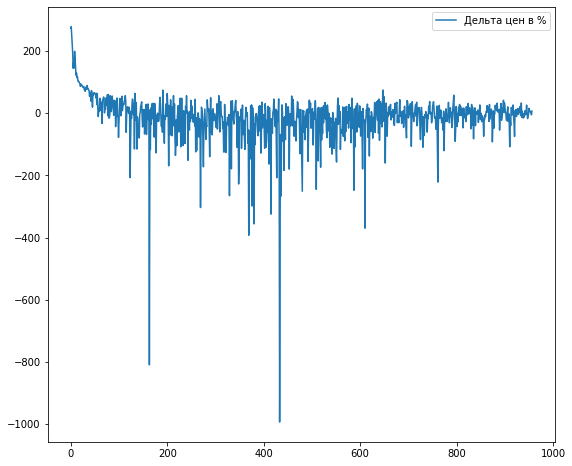

In [79]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(visual_data['Price_Delta_Percent'], label='Дельта цен в %')
ax.legend()

### Тестовые данные

#### Прогнозирование

In [80]:
Ridge_Prediction = model.predict(X_test)
R2_score = sl.metrics.r2_score(test_data['Price'], Ridge_Prediction)
R2_score

0.8694032264715132

In [81]:
test_data['Pred_Price'] = Ridge_Prediction
test_data['Price_Delta'] = test_data['Price'] - test_data['Pred_Price']
test_data['Price_Delta_Percent'] = test_data['Price_Delta'] * 100 / test_data['Price']

#### Визуализация

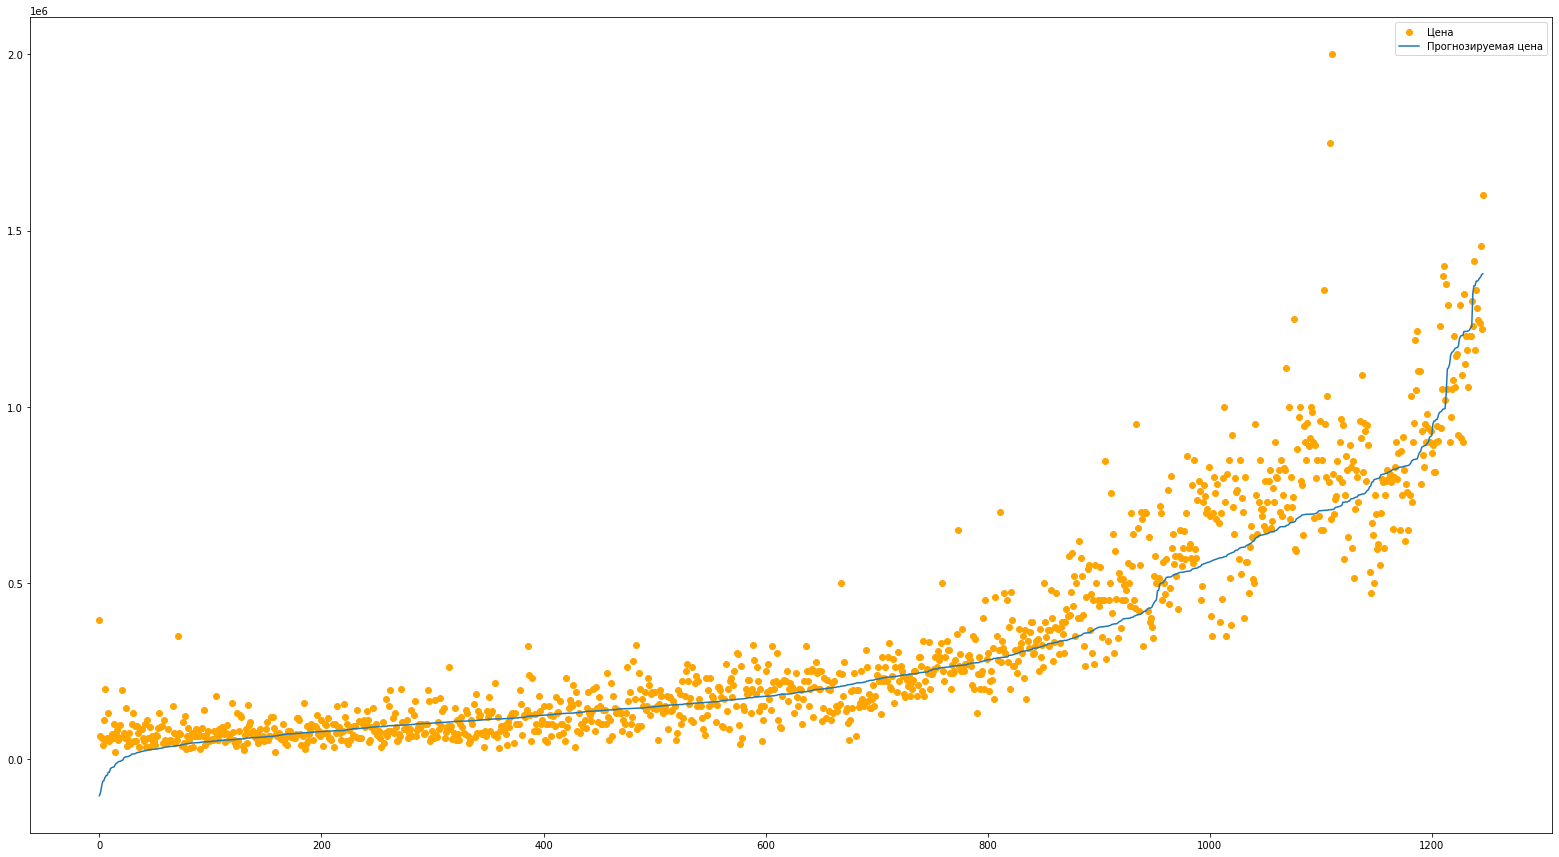

In [82]:
visual_data = test_data.sort_values('Pred_Price')
visual_data = visual_data.reset_index(drop=True)
fig = plt.figure(figsize=(60, 15))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.scatter(visual_data.index, visual_data['Price'], label='Цена', color='orange')
ax.plot(visual_data.index, visual_data['Pred_Price'], label='Прогнозируемая цена')
ax.legend()

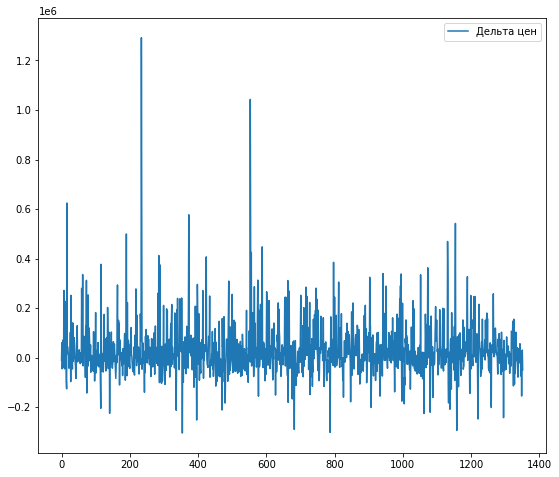

In [83]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(test_data['Price_Delta'], label='Дельта цен')
ax.legend()

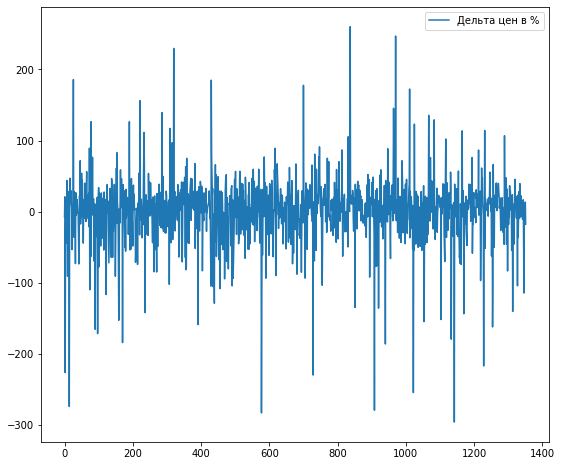

In [84]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(test_data['Price_Delta_Percent'], label='Дельта цен в %')
ax.legend()

## Регрессия ElasticNet

### Тренировочные данные

#### Обучение модели

In [85]:
model = ElasticNetCV()
model.fit(X_train, train_data[target_feature])
ElasticNet_Prediction = model.predict(X_train)
R2_score = sl.metrics.r2_score(train_data['Price'], ElasticNet_Prediction)
R2_score

0.03339218711112035

In [86]:
train_data['Pred_Price'] = ElasticNet_Prediction
train_data['Price_Delta'] = train_data['Price'] - train_data['Pred_Price']
train_data['Price_Delta_Percent'] = train_data['Price_Delta'] * 100 / train_data['Price']

#### Визуализация

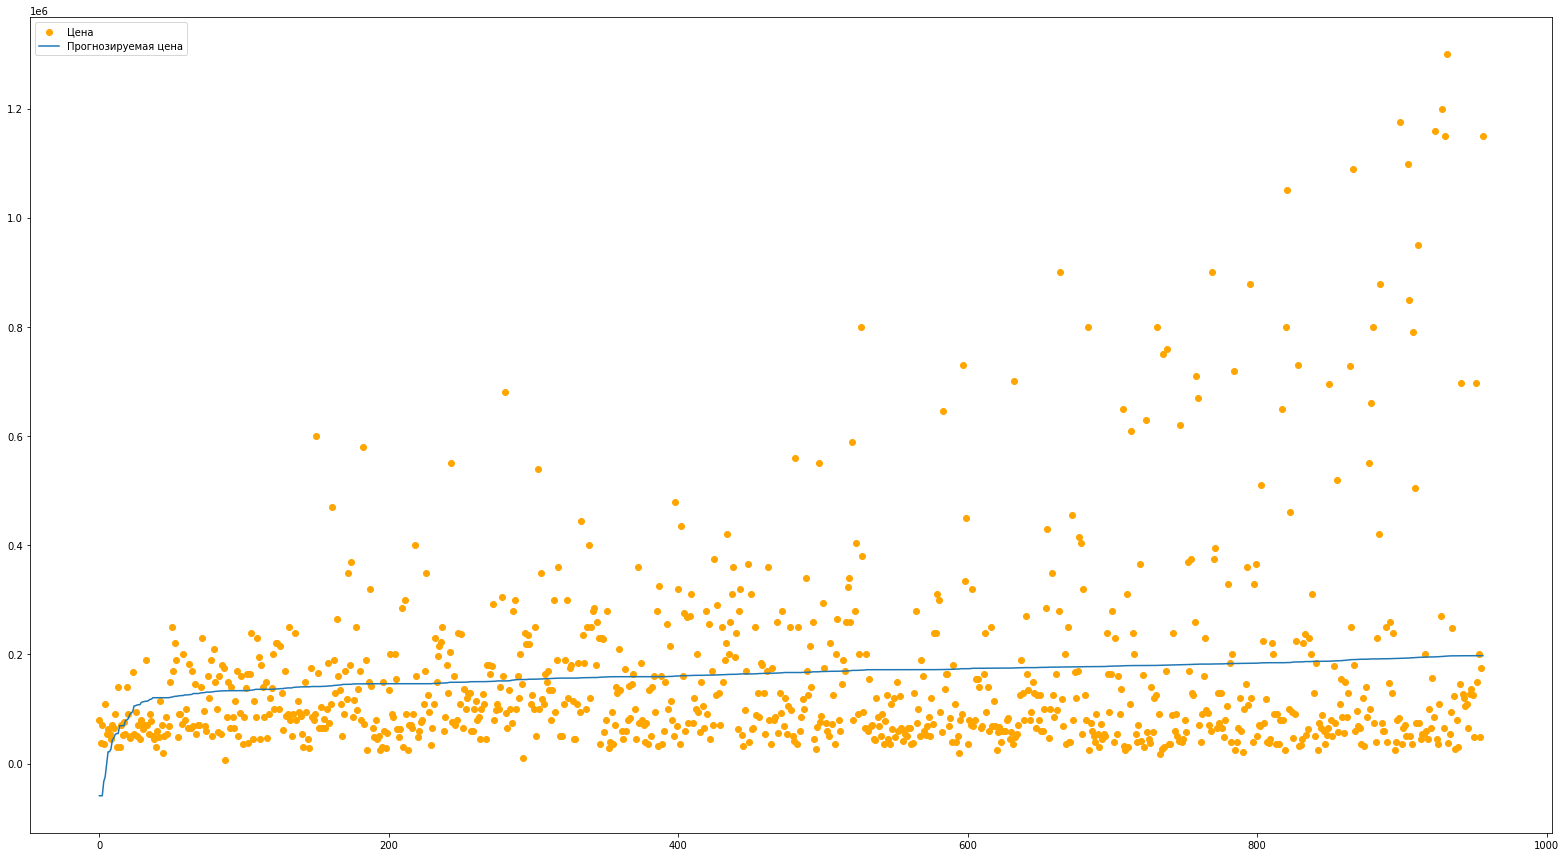

In [87]:
visual_data = train_data.sort_values('Pred_Price')
visual_data = visual_data.reset_index(drop=True)
fig = plt.figure(figsize=(60, 15))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.scatter(visual_data.index, visual_data['Price'], label='Цена', color='orange')
ax.plot(visual_data.index, visual_data['Pred_Price'], label='Прогнозируемая цена')
ax.legend()

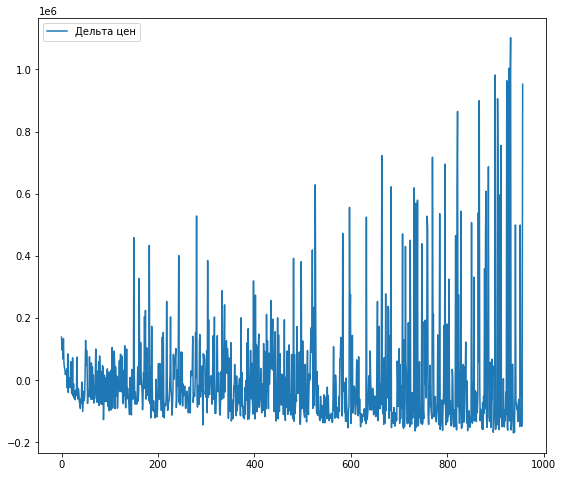

In [88]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(visual_data['Price_Delta'], label='Дельта цен')
ax.legend()

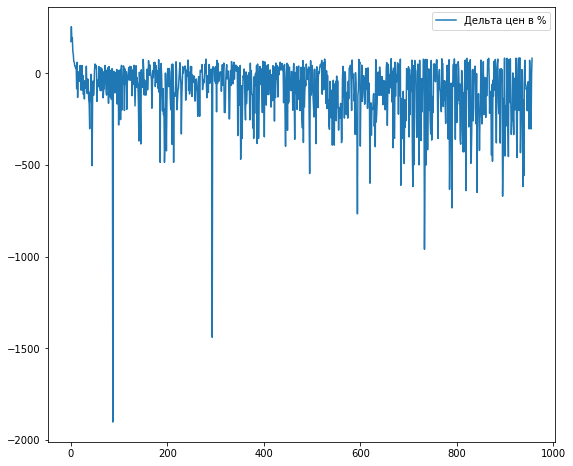

In [89]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(visual_data['Price_Delta_Percent'], label='Дельта цен в %')
ax.legend()

### Тестовые данные

#### Прогнозирование

In [90]:
ElasticNet_Prediction = model.predict(X_test)
R2_score = sl.metrics.r2_score(test_data['Price'], ElasticNet_Prediction)
R2_score

-0.22071423924821443

In [91]:
test_data['Pred_Price'] = ElasticNet_Prediction
test_data['Price_Delta'] = test_data['Price'] - test_data['Pred_Price']
test_data['Price_Delta_Percent'] = test_data['Price_Delta'] * 100 / test_data['Price']

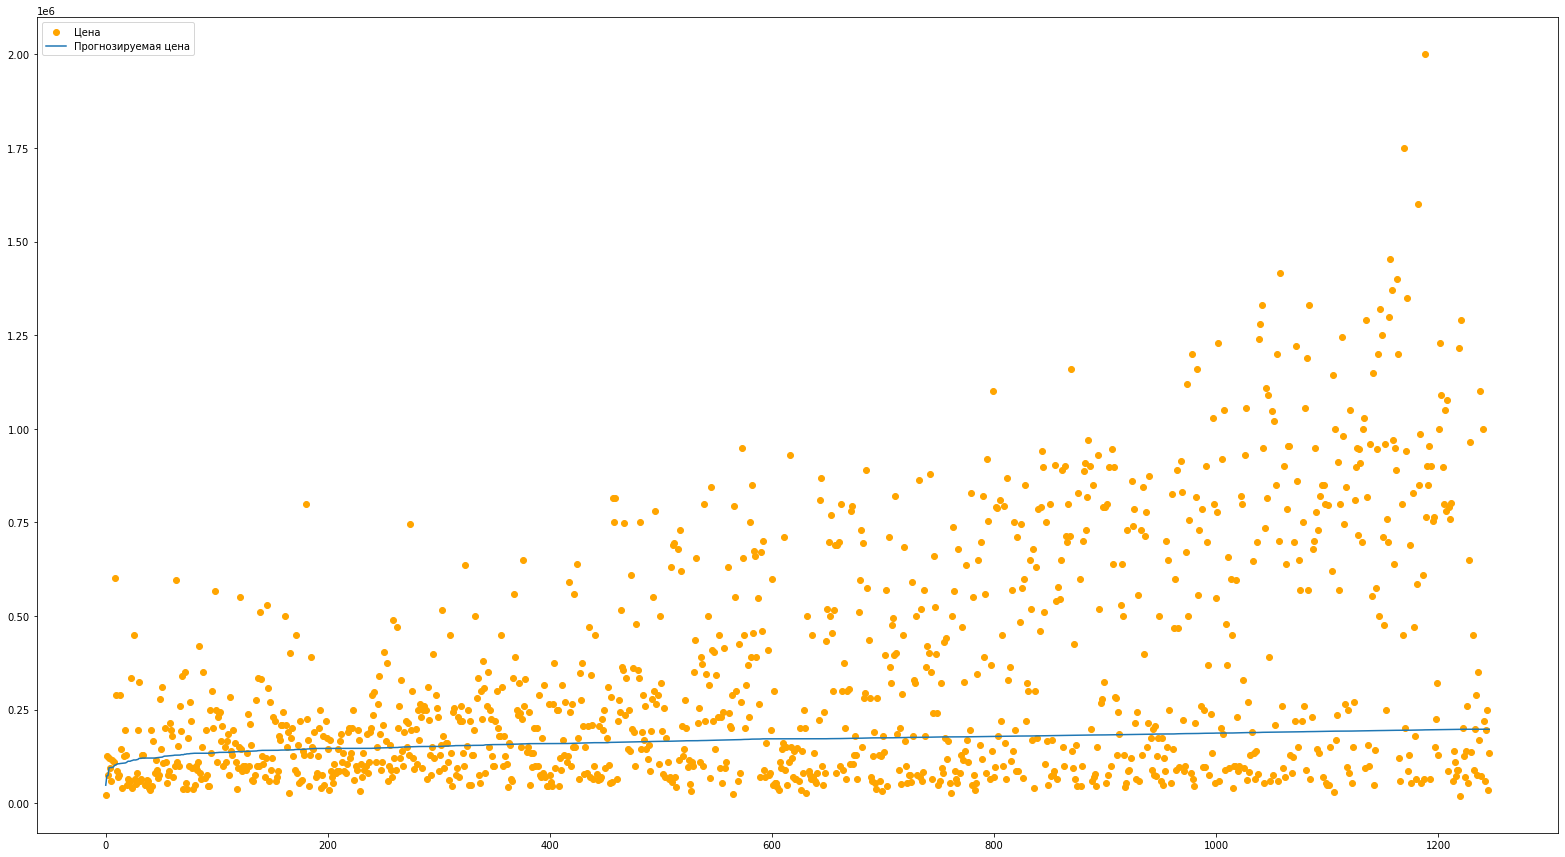

In [92]:
visual_data = test_data.sort_values('Pred_Price')
visual_data = visual_data.reset_index(drop=True)
fig = plt.figure(figsize=(60, 15))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.scatter(visual_data.index, visual_data['Price'], label='Цена', color='orange')
ax.plot(visual_data.index, visual_data['Pred_Price'], label='Прогнозируемая цена')
ax.legend()

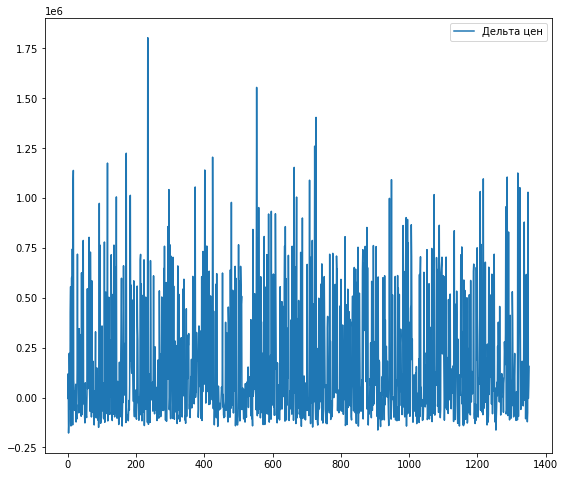

In [93]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(test_data['Price_Delta'], label='Дельта цен')
ax.legend()

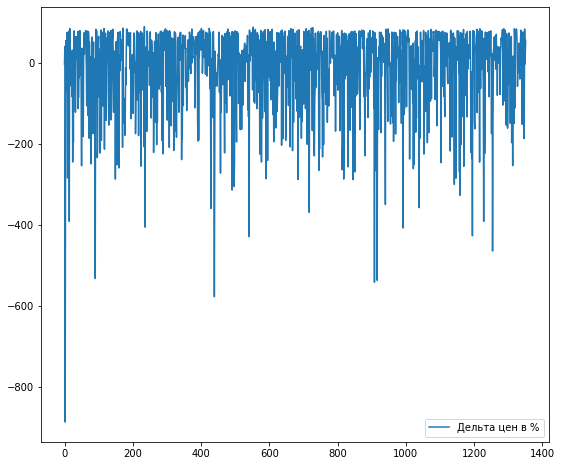

In [94]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
# fig, ax = plt.subplots()
ax.plot(test_data['Price_Delta_Percent'], label='Дельта цен в %')
ax.legend()